In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')

### Missing Values

In [3]:
df.isnull().sum()[df.isnull().sum()!=0]

ecec20         5
hp20           5
xhp20          5
BulkDensity    4
dtype: int64

In [4]:
for column in df.columns:
  if df[column].isnull().any():
    df[column].fillna(df[column].mean(), inplace=True)
    

### EDA

In [5]:
df.columns

Index(['site', 'PID', 'lon', 'lat', 'pH', 'alb', 'bio1', 'bio12', 'bio15',
       'bio7', 'bp', 'cec20', 'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn',
       'mb1', 'mb2', 'mb3', 'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope',
       'snd20', 'soc20', 'tim', 'wp', 'xhp20', 'BulkDensity', 'N', 'P', 'K',
       'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B'],
      dtype='object')

In [6]:
df.drop(columns=['site','lon','lat'],inplace=True)

In [7]:
df.columns

Index(['PID', 'pH', 'alb', 'bio1', 'bio12', 'bio15', 'bio7', 'bp', 'cec20',
       'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3',
       'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope', 'snd20', 'soc20', 'tim',
       'wp', 'xhp20', 'BulkDensity', 'N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe',
       'Mn', 'Zn', 'Cu', 'B'],
      dtype='object')

In [8]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

per_target_importances = {}

for nutrient in target_columns:
    X = df.drop(columns=target_columns + ['PID'])
    y = df[nutrient]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    importances = model.feature_importances_
    feature_names = X.columns
    
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    

    importance_df['Importance (%)'] = 100 * importance_df['Importance'] / importance_df['Importance'].sum()
    
    per_target_importances[nutrient] = importance_df


    print(f"Feature importances for {nutrient}:")
    print(importance_df[['Feature', 'Importance (%)']])
    
    print("\n" + "="*40 + "\n")
    importance_df['Cumulative (%)'] = importance_df['Importance (%)'].cumsum()
    selected = importance_df[importance_df['Cumulative (%)'] <= 80]['Feature'].tolist()

    # Add one more feature if 80% was not reached exactly
    if len(selected) < len(importance_df) and importance_df['Cumulative (%)'].iloc[len(selected)] < 80:
        selected.append(importance_df['Feature'].iloc[len(selected)])

    globals()[f'selected_features_{nutrient}'] = selected


Feature importances for N:
        Feature  Importance (%)
0            pH       22.610386
12         lstd        9.545344
21         ph20        8.244521
24        soc20        6.348211
15          mb2        4.244223
8          dows        3.368163
3         bio12        3.335776
13         lstn        2.711888
4         bio15        2.564808
18         mdem        2.525634
5          bio7        2.401593
9        ecec20        2.294228
6            bp        2.239915
19         para        2.129034
22        slope        2.052380
17          mb7        2.032248
25          tim        1.951394
20         parv        1.918474
26           wp        1.819810
1           alb        1.767681
14          mb1        1.749021
27        xhp20        1.709013
23        snd20        1.707449
2          bio1        1.664475
28  BulkDensity        1.660564
7         cec20        1.620211
16          mb3        1.502783
10         hp20        1.483177
11           ls        0.797597


Feature imp

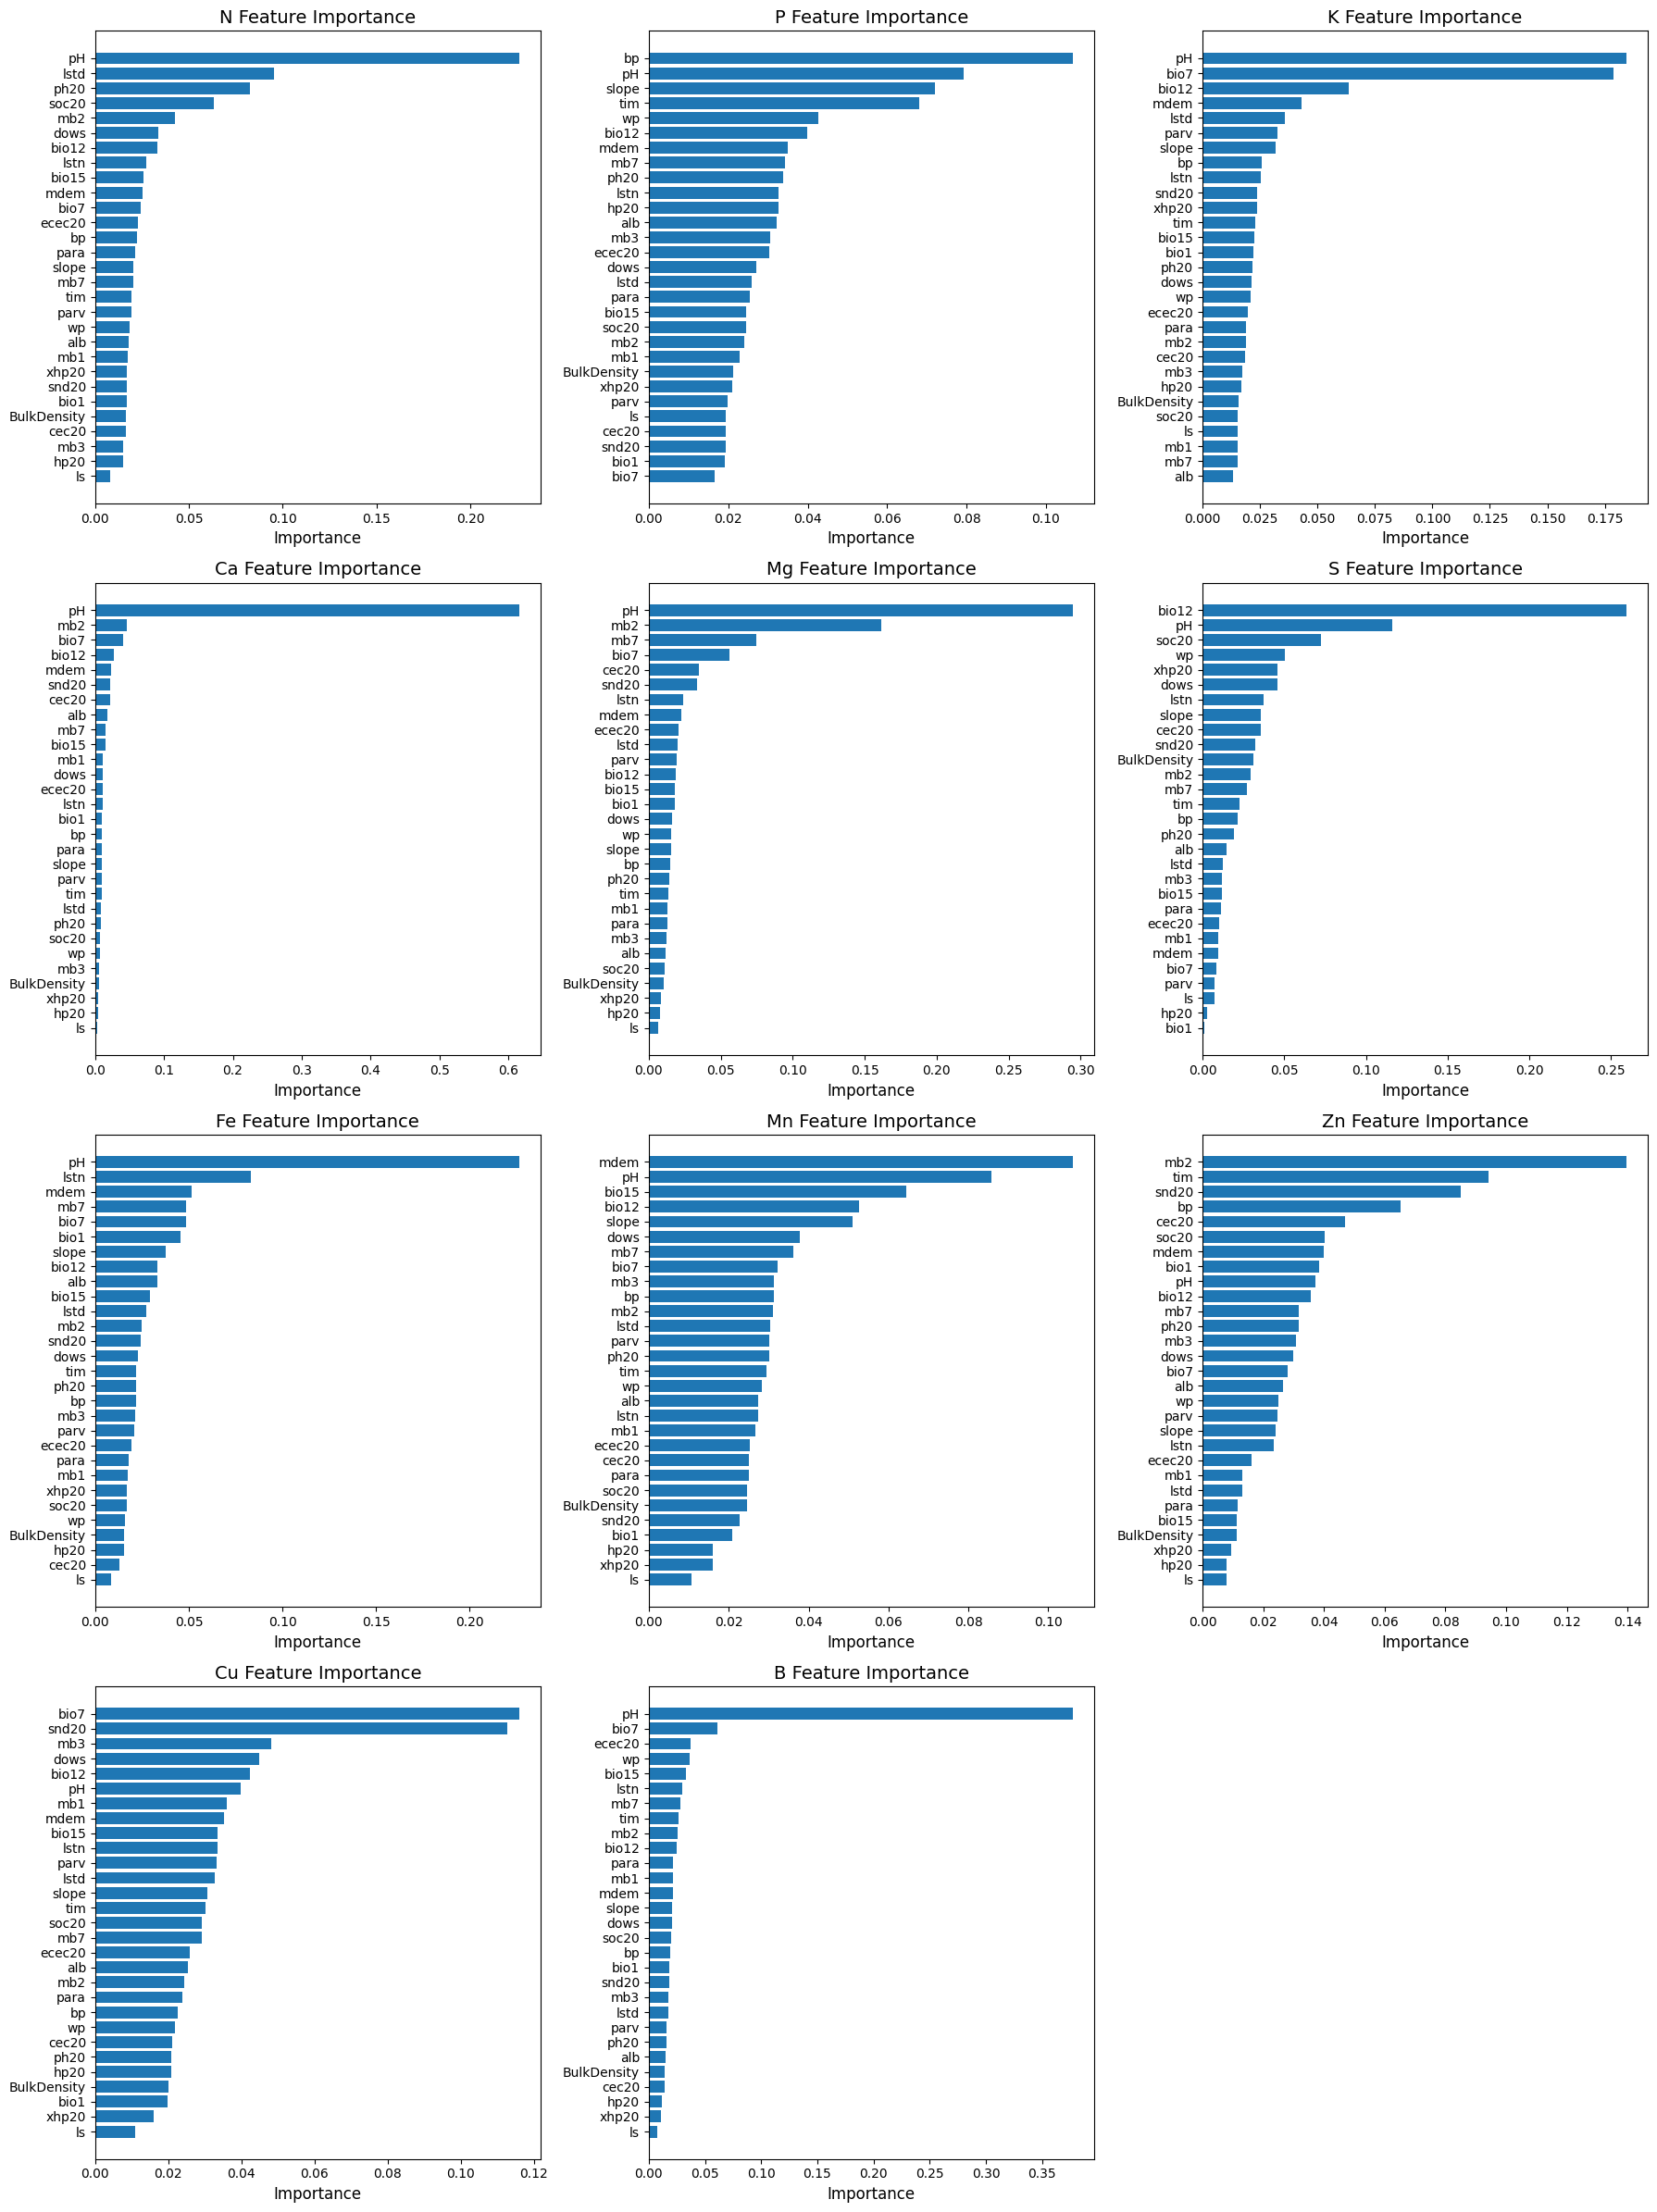

In [10]:
import matplotlib.pyplot as plt
n_targets = len(per_target_importances)
ncols = 3
nrows = (n_targets + ncols - 1) // ncols  
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
axes = axes.flatten()
for idx, (nutrient, imp_df) in enumerate(per_target_importances.items()):
    ax = axes[idx]
    ax.barh(imp_df['Feature'], imp_df['Importance'])
    ax.set_title(f'{nutrient} Feature Importance', fontsize=14)
    ax.invert_yaxis()
    ax.set_xlabel('Importance', fontsize=12)
    ax.tick_params(axis='y', labelsize=10)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.savefig("feature_importance_all_nutrients.png", dpi=300) 
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
def predire(Nutrient,Nutrient_df) :
    X = Nutrient_df.drop(columns=Nutrient)
    y = df[Nutrient]
    X_test = df.drop(columns=['PID',"site"])
    

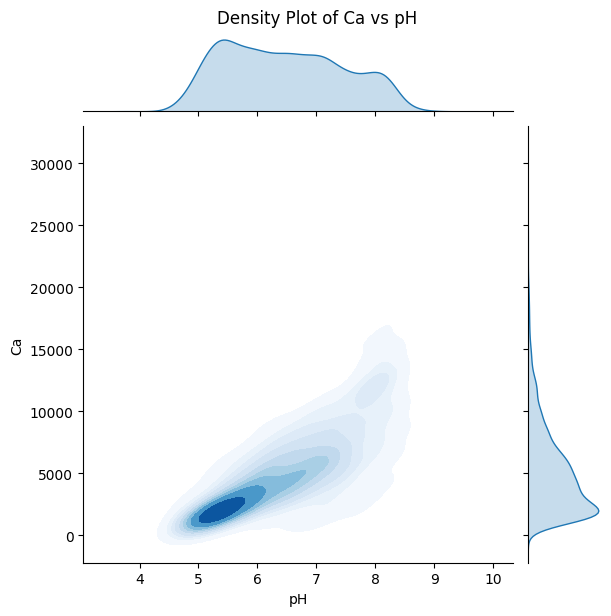

In [61]:
sns.jointplot(data=df, x='pH', y='Ca', kind='kde', fill=True, cmap='Blues', height=6)
plt.suptitle("Density Plot of Ca vs pH", y=1.02)
plt.show()


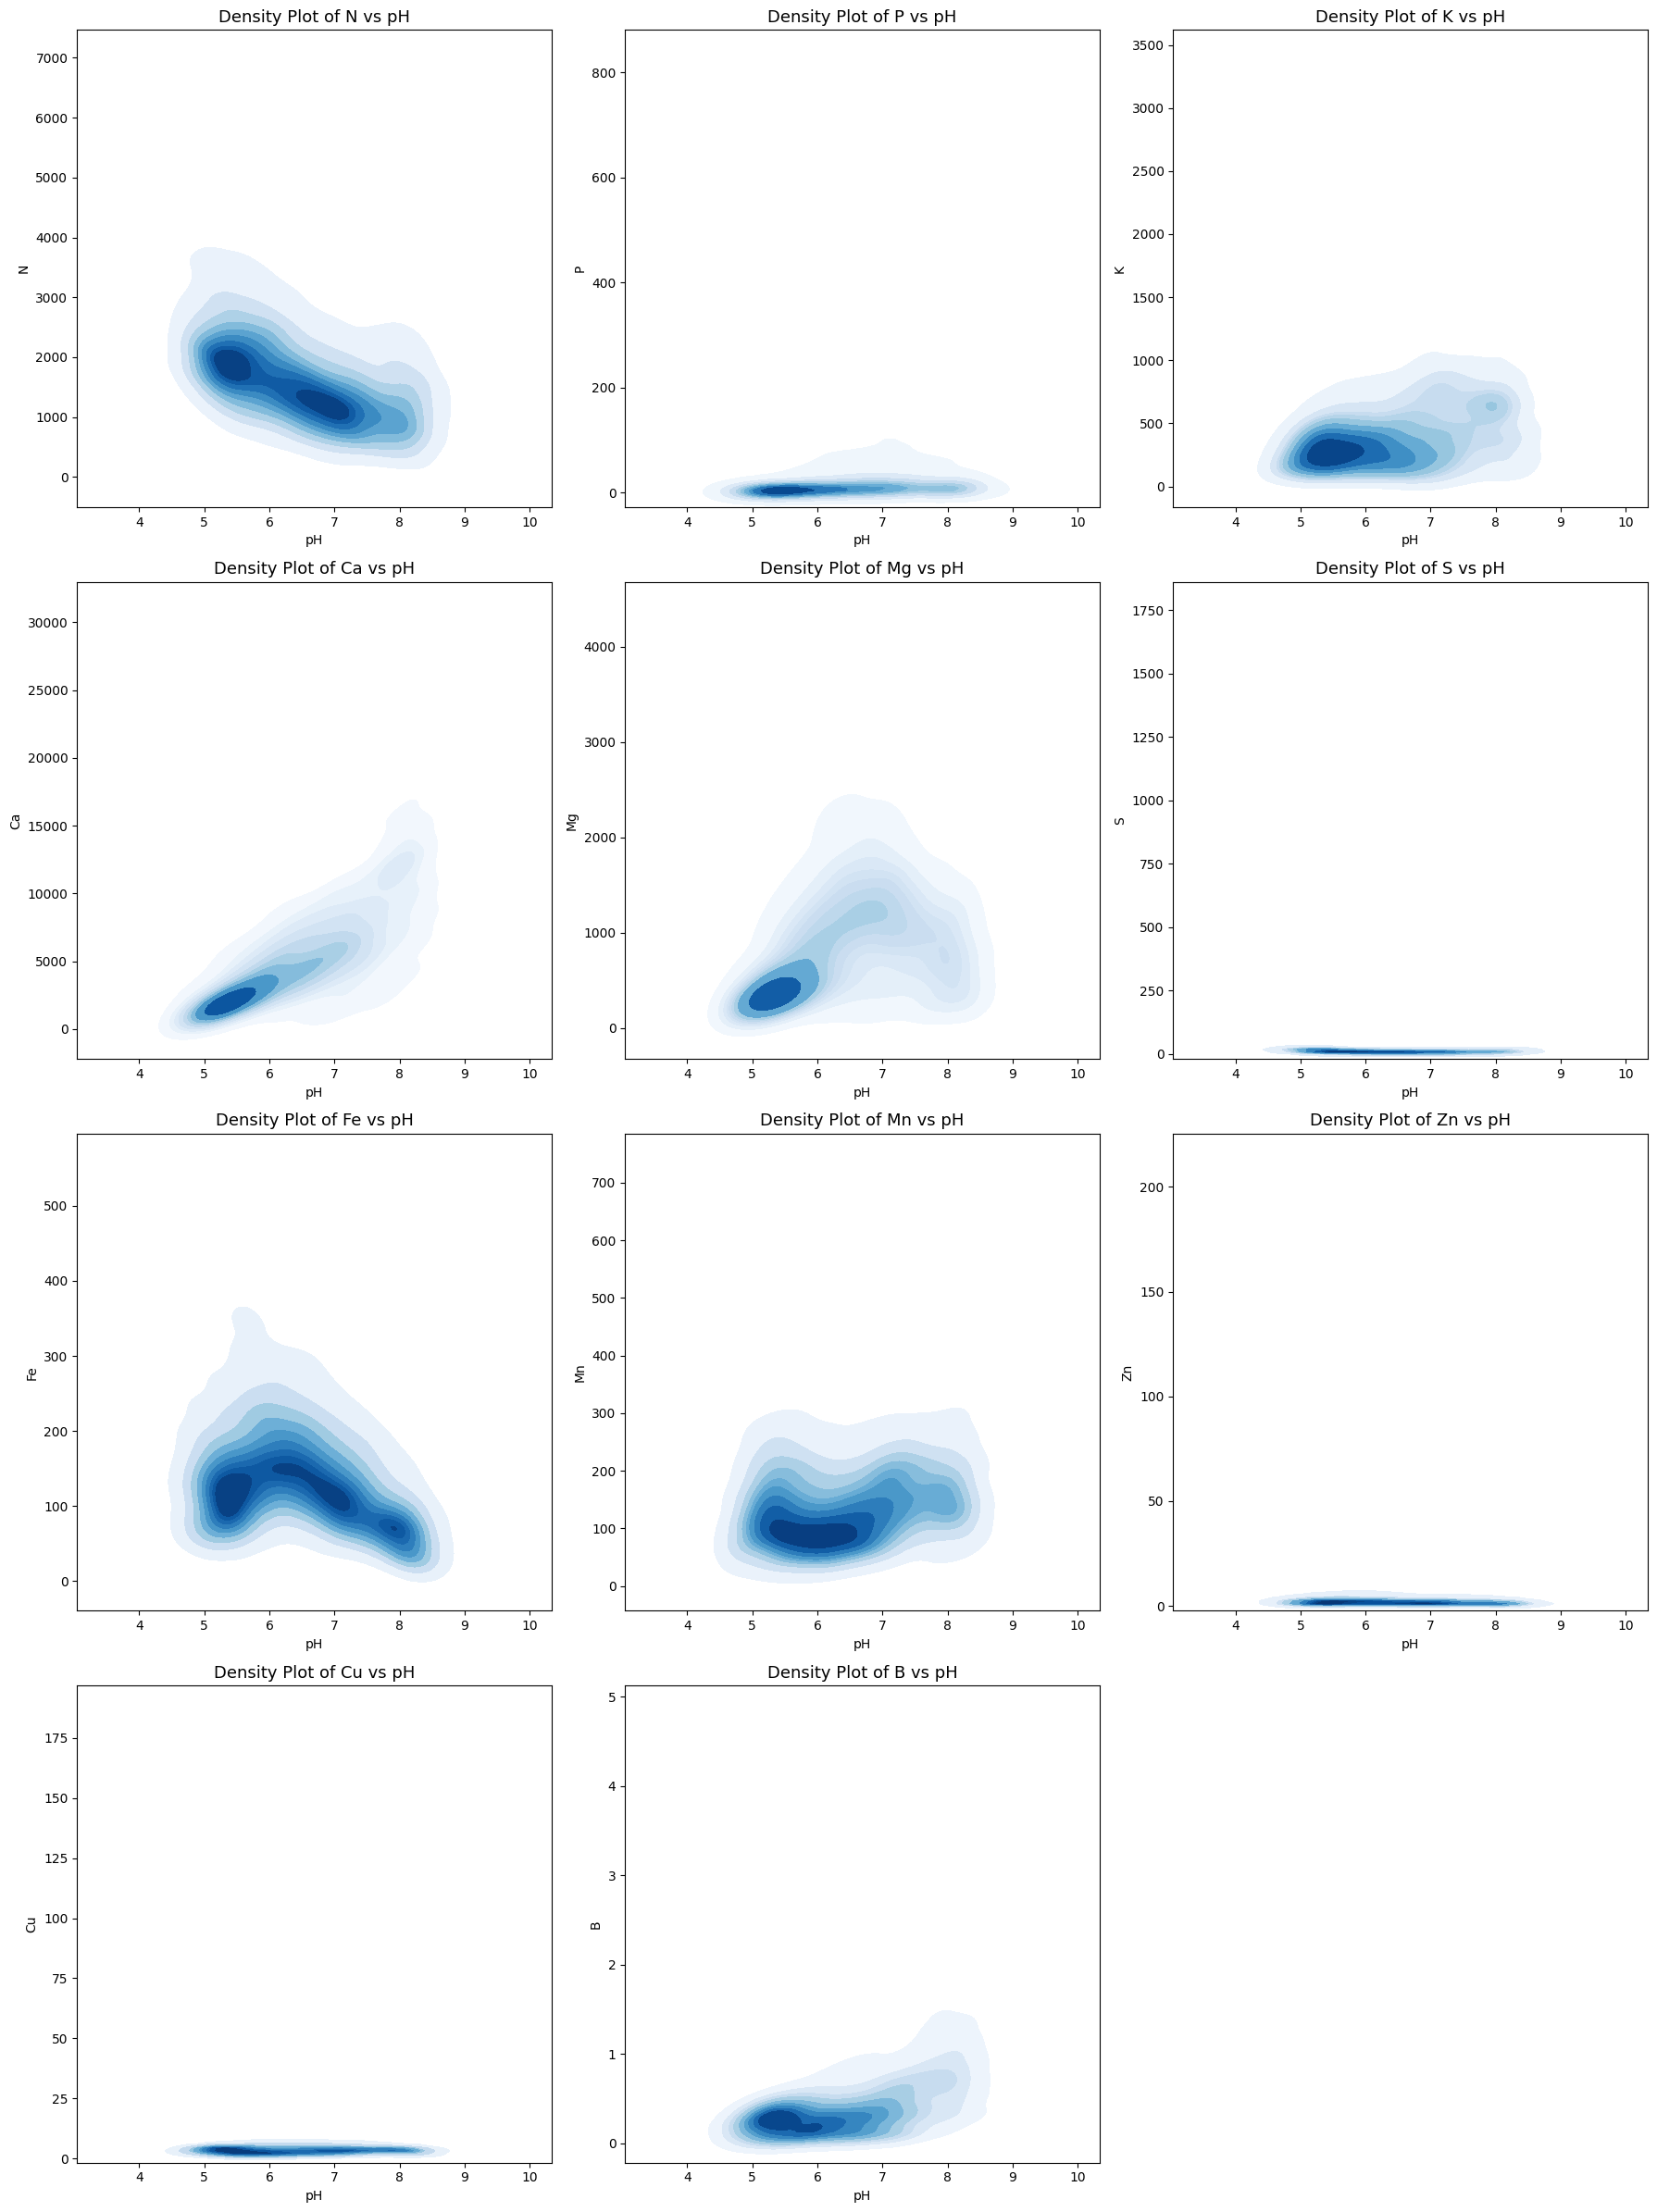

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


nutrients = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']


ncols = 3
nrows = (len(nutrients) + ncols - 1) // ncols


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6 * nrows))
axes = axes.flatten()

for idx, nutrient in enumerate(nutrients):
    ax = axes[idx]
    sns.kdeplot(
        data=df,
        x='pH',
        y=nutrient,
        fill=True,
        cmap='Blues',
        thresh=0.05,
        ax=ax
    )
    ax.set_title(f'Density Plot of {nutrient} vs pH', fontsize=13)
    ax.set_xlabel("pH")
    ax.set_ylabel(nutrient)


for i in range(len(nutrients), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.savefig("all_nutrients_vs_pH_density.png", dpi=300)
plt.show()


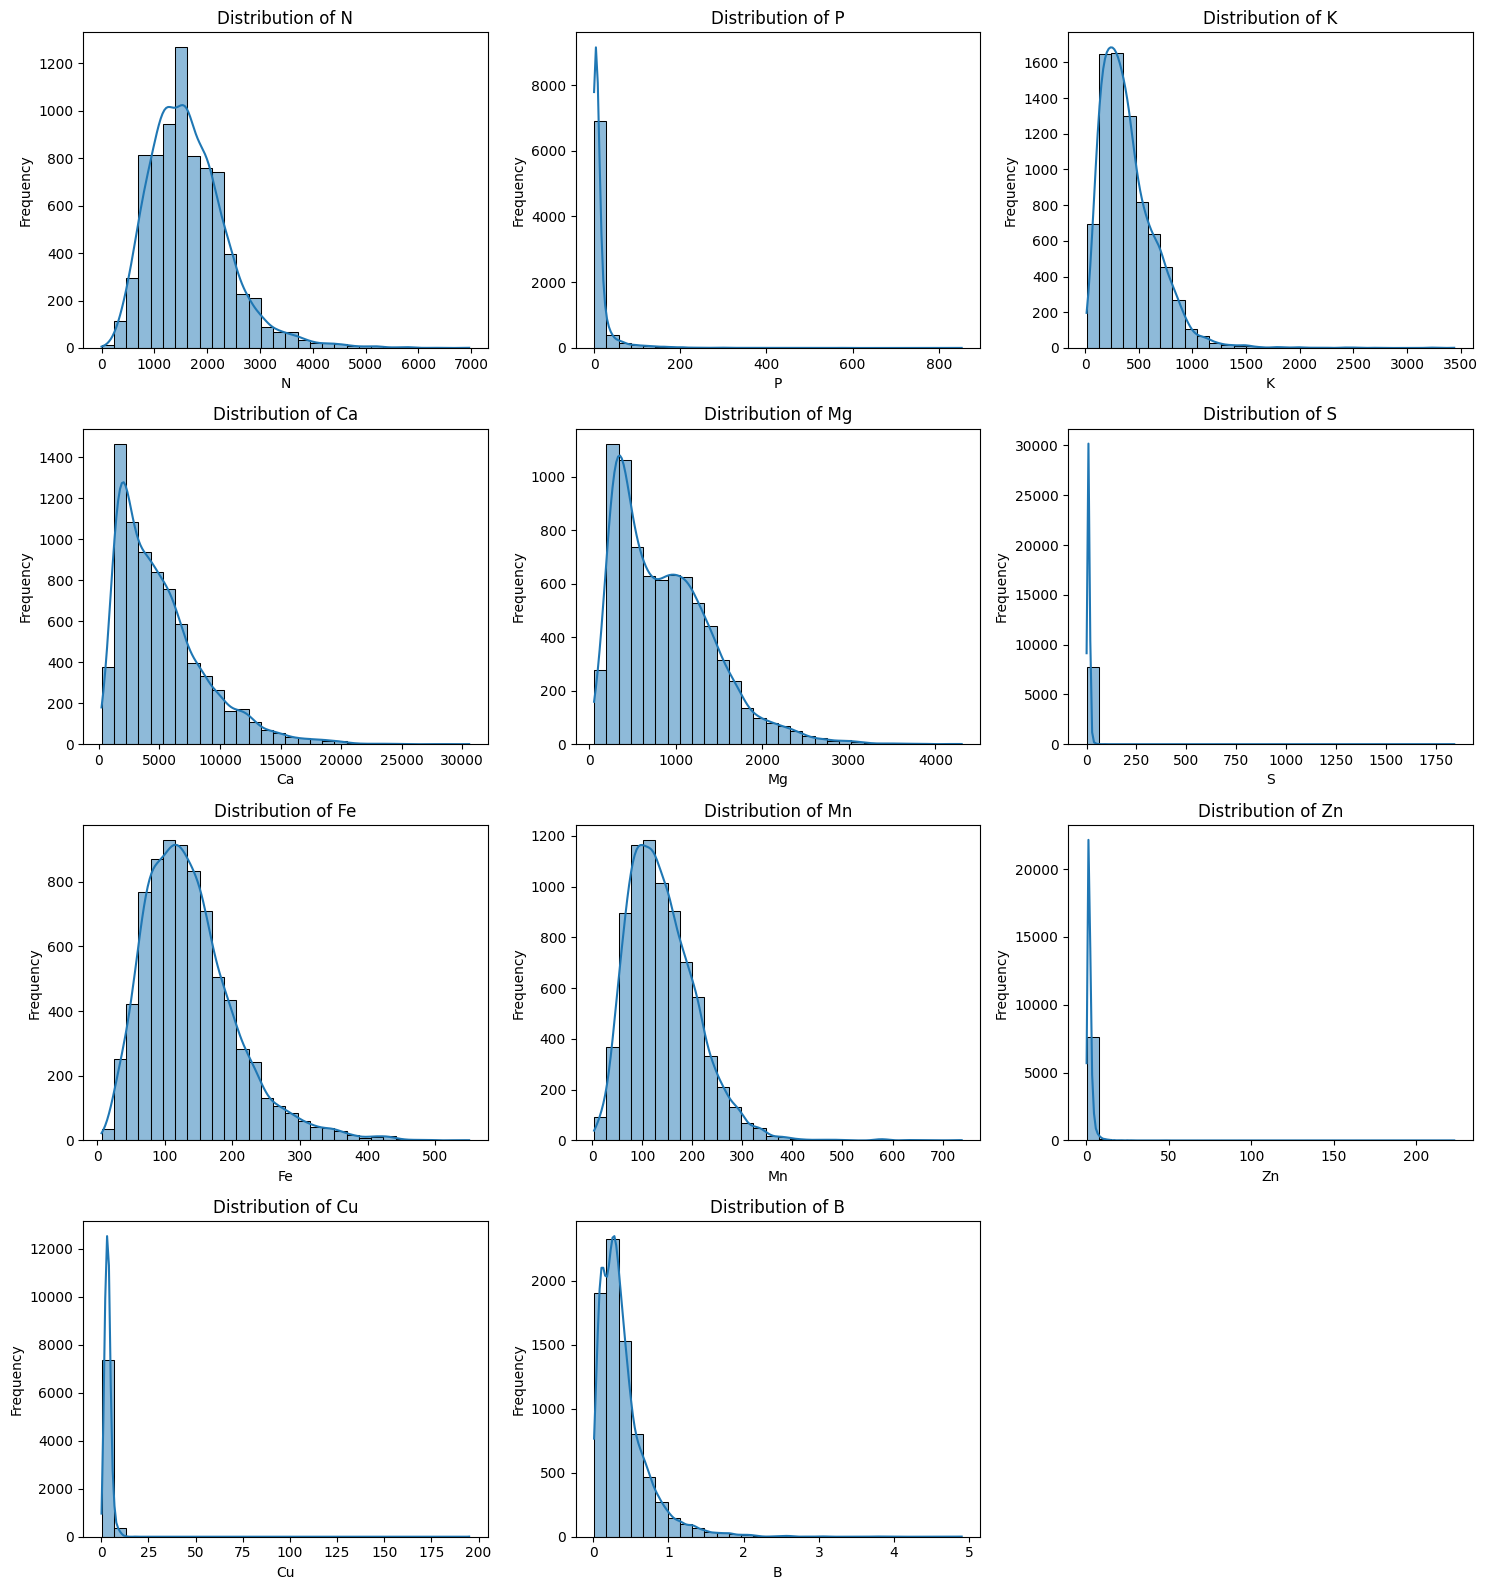

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


n = len(target_columns)
cols = 3  
rows = (n + cols - 1) // cols


plt.figure(figsize=(5 * cols, 4 * rows))

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[nutrient], bins=30, kde=True)
    plt.title(f'Distribution of {nutrient}')
    plt.xlabel(nutrient)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.savefig('nutrient_distributions.png', dpi=300)  

plt.show()


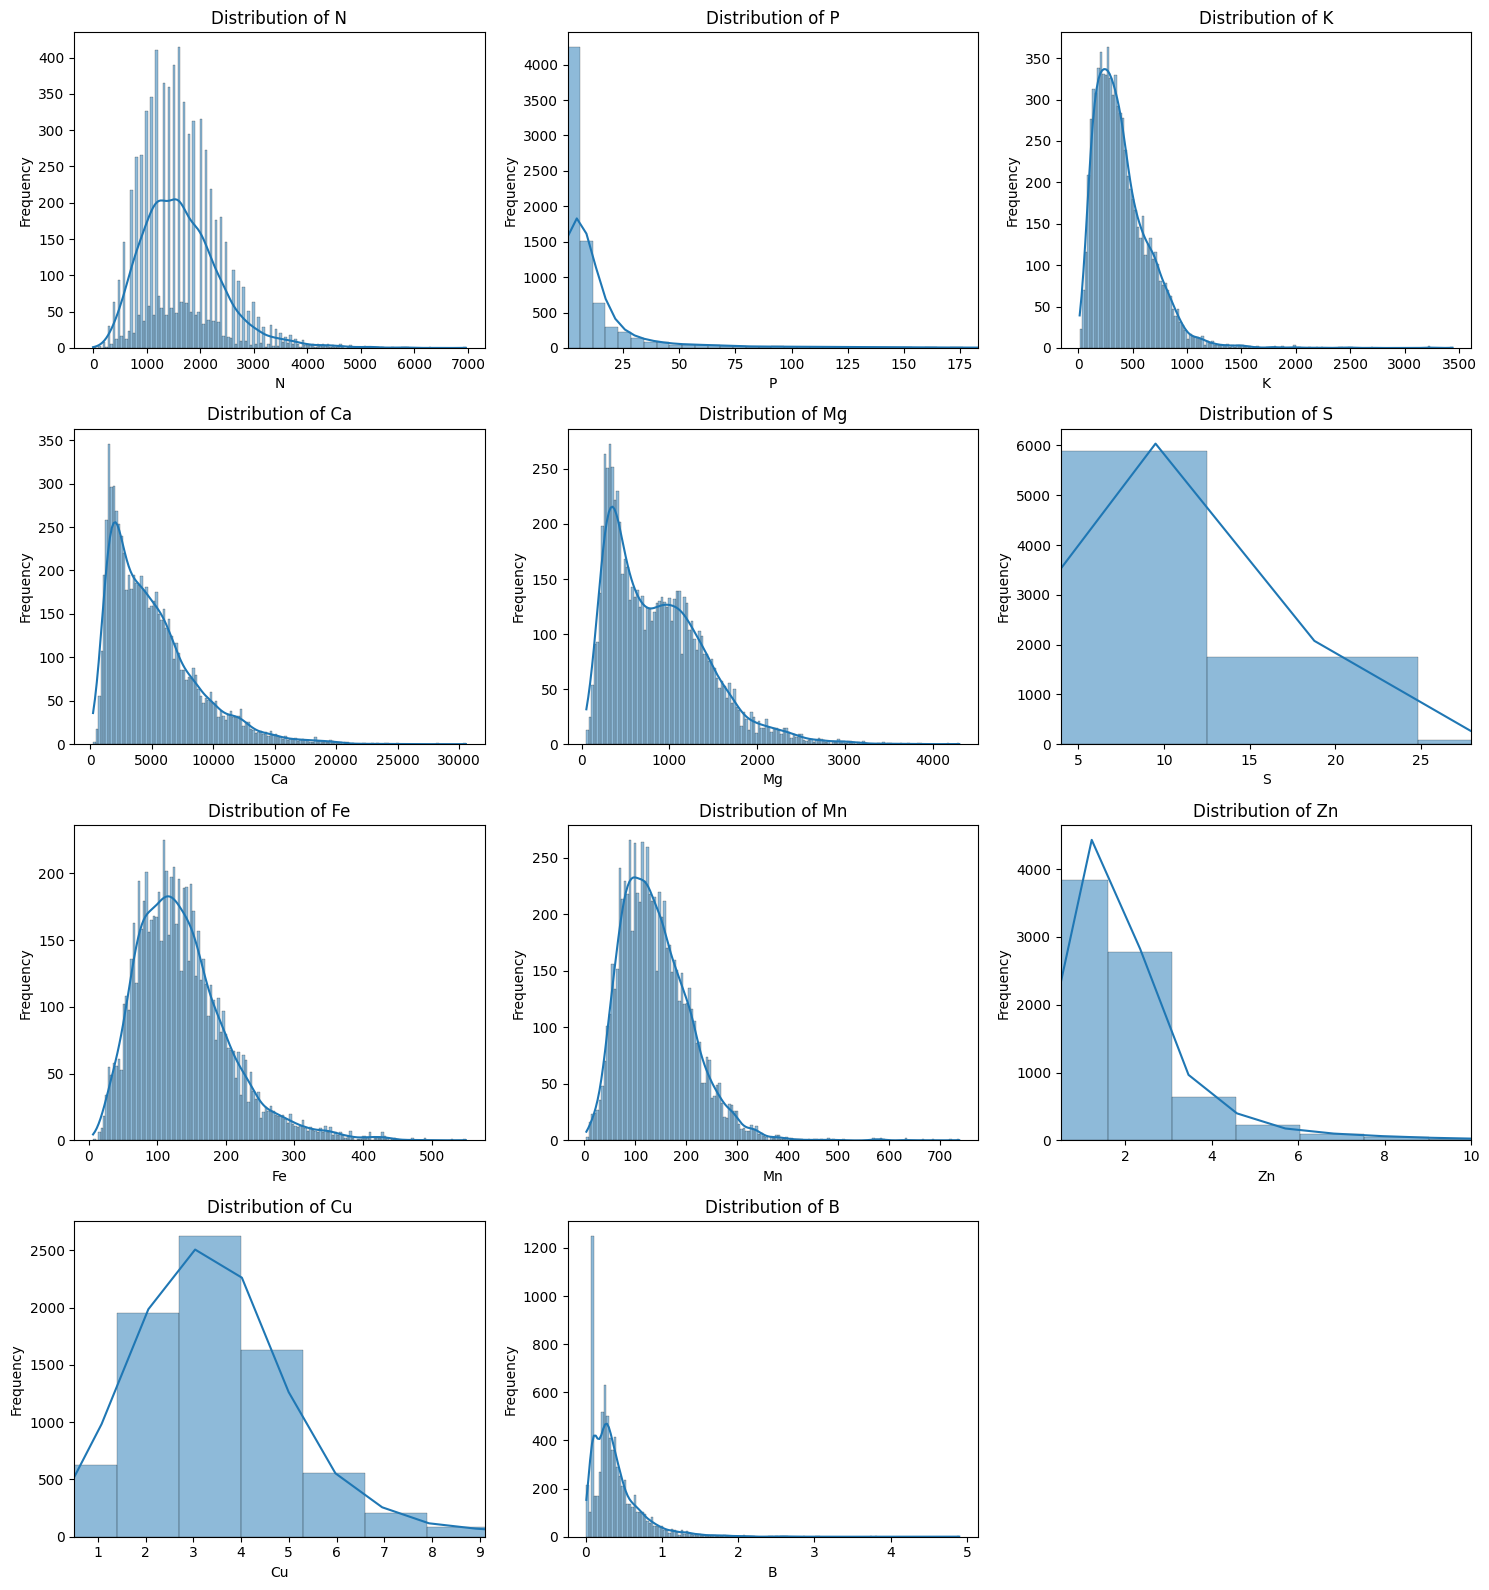

In [15]:
n = len(target_columns)
cols = 3
rows = (n + cols - 1) // cols
plt.figure(figsize=(5 * cols, 4 * rows))

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[nutrient], bins=150, kde=True)
    plt.title(f'Distribution of {nutrient}')
    plt.xlabel(nutrient)
    plt.ylabel('Frequency')
    

    if nutrient in ['P', 'S', 'Cu', 'Zn']:

        low, high = df[nutrient].quantile([0.01, 0.99])
        plt.xlim(low, high)

plt.tight_layout()
plt.savefig('nutrient_distributions_zoomed.png', dpi=300)
plt.show()


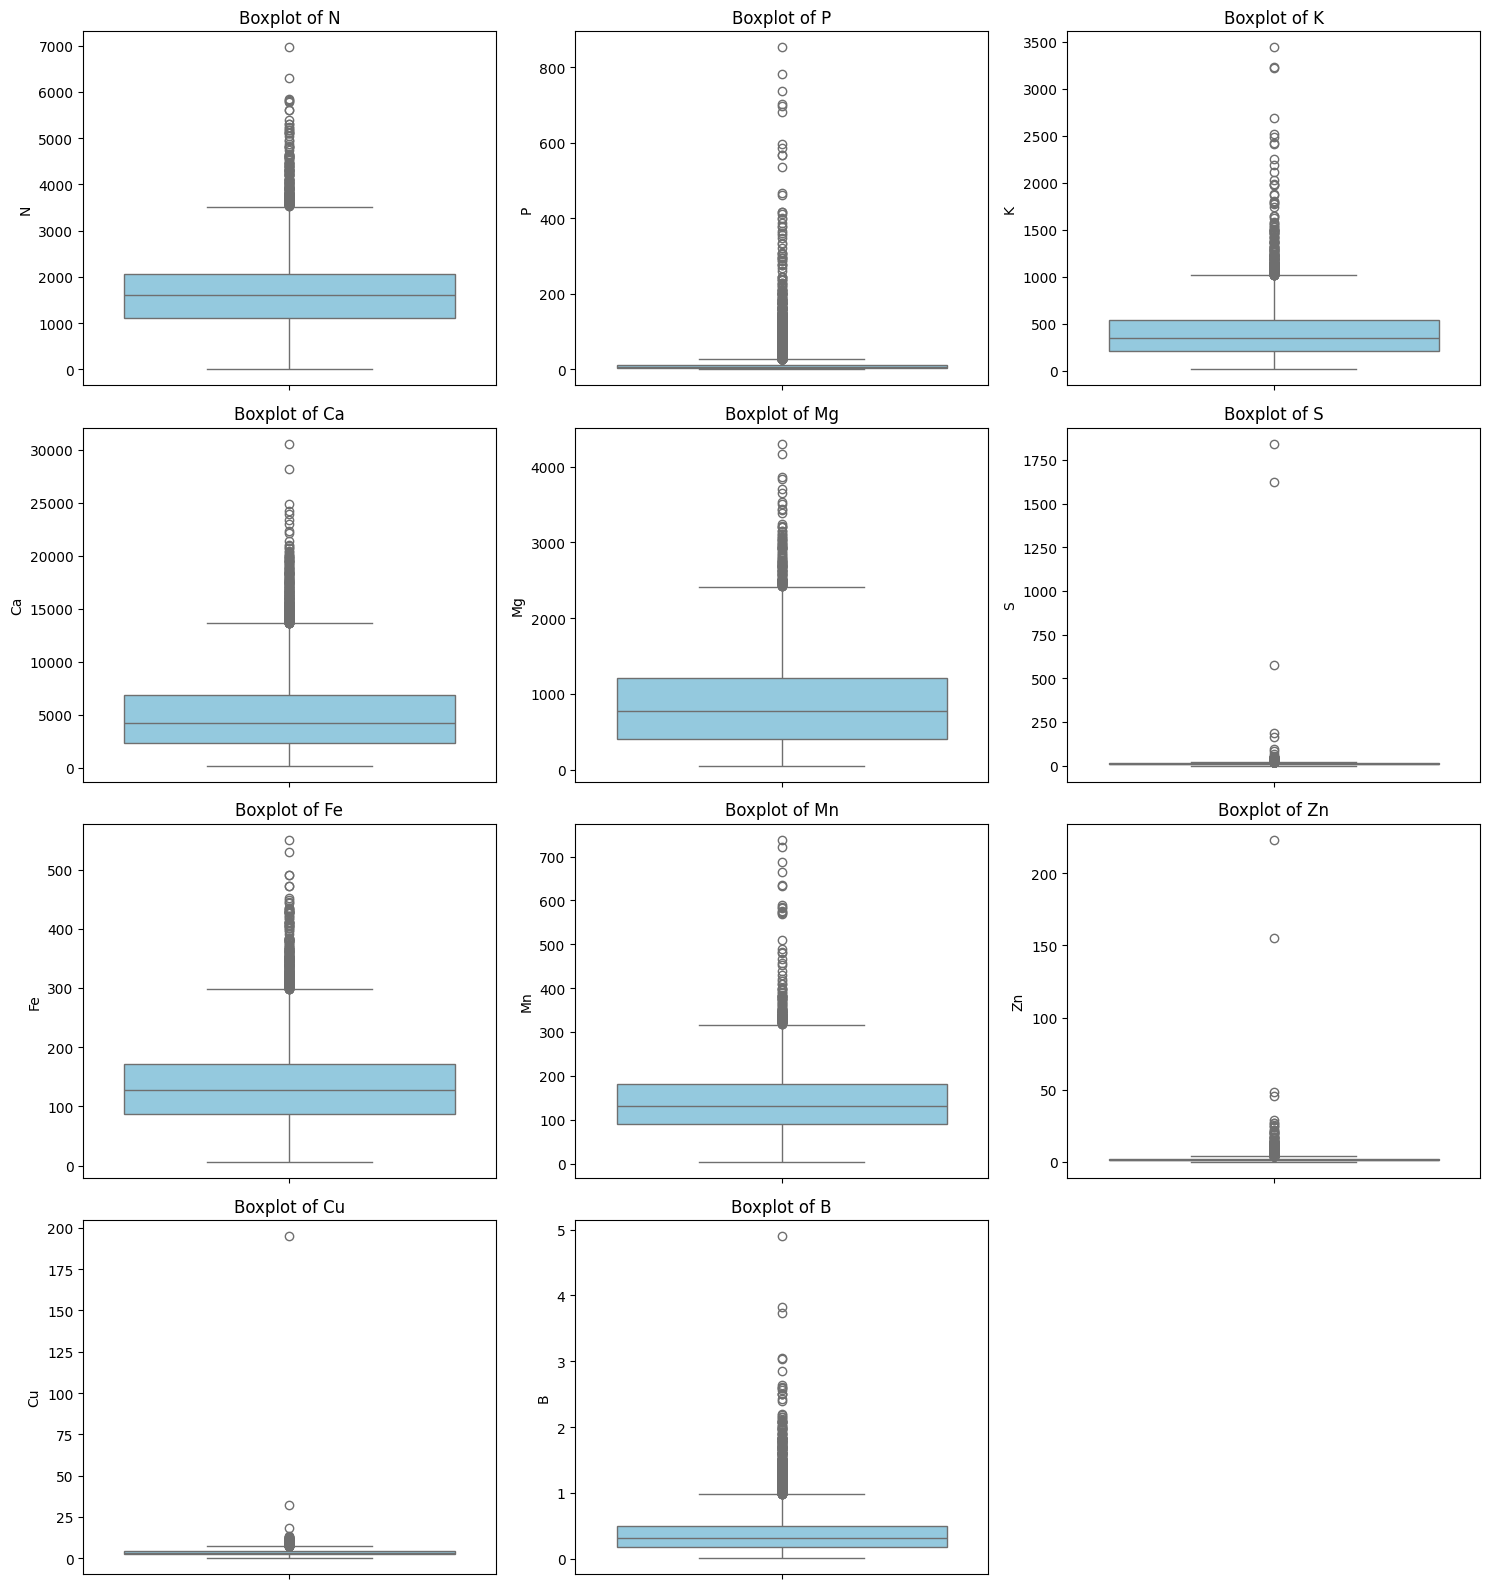

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


n = len(target_columns)
cols = 3 
rows = (n + cols - 1) // cols


plt.figure(figsize=(5 * cols, 4 * rows))

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[nutrient], color='skyblue')
    plt.title(f'Boxplot of {nutrient}')
    plt.xlabel('')
    plt.ylabel(nutrient)

plt.tight_layout()


plt.savefig("nutrient_boxplots.png", dpi=300)


plt.show()


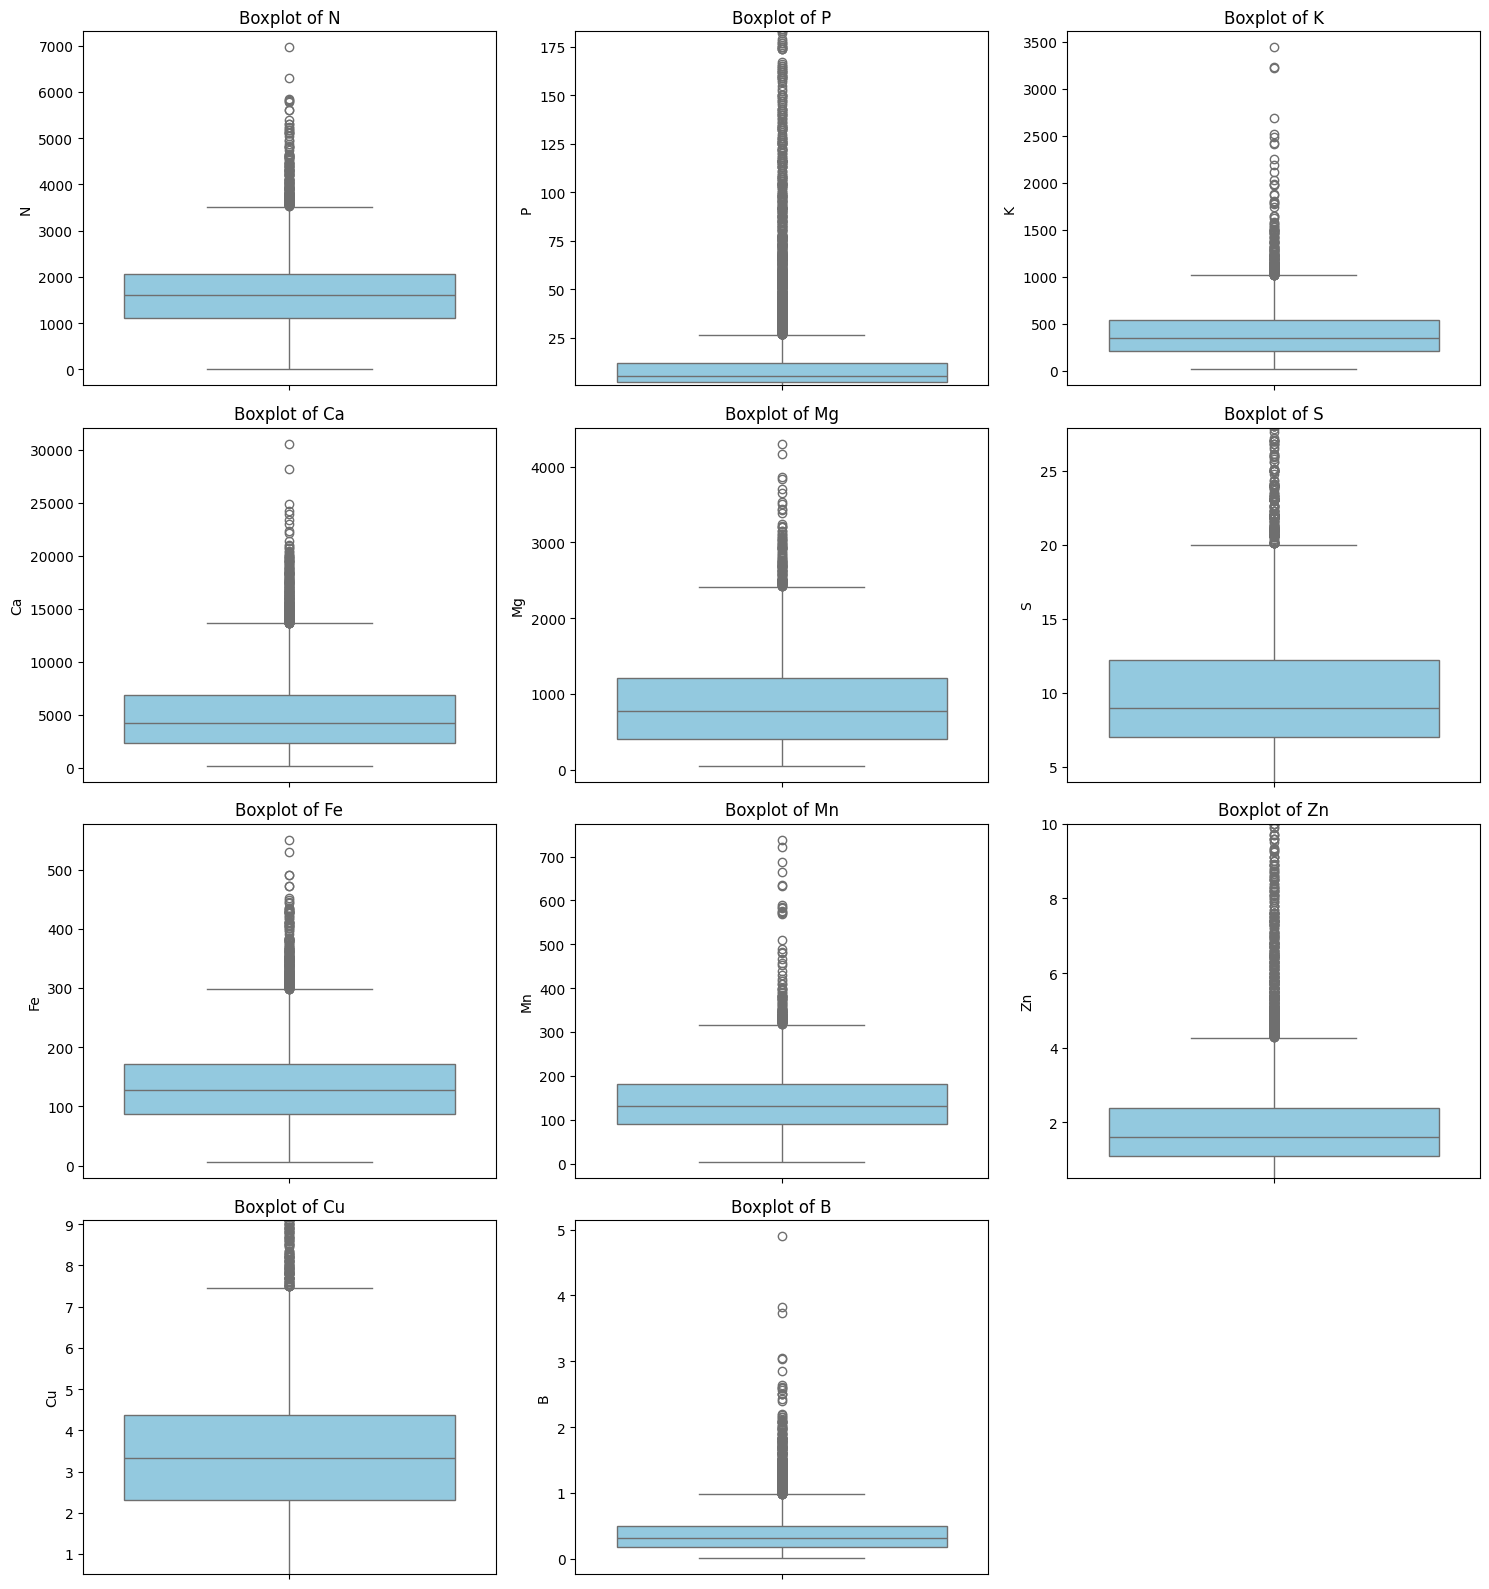

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns


n = len(target_columns)
cols = 3  
rows = (n + cols - 1) // cols


plt.figure(figsize=(5 * cols, 4 * rows))

zoom_targets = ['P', 'S', 'Cu', 'Zn']

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(y=df[nutrient], color='skyblue')
    plt.title(f'Boxplot of {nutrient}')
    plt.xlabel('')
    plt.ylabel(nutrient)
    

    if nutrient in zoom_targets:
        low, high = df[nutrient].quantile([0.01, 0.99])
        plt.ylim(low, high)

plt.tight_layout()


plt.savefig("nutrient_boxplots_zoomed.png", dpi=300)

plt.show()


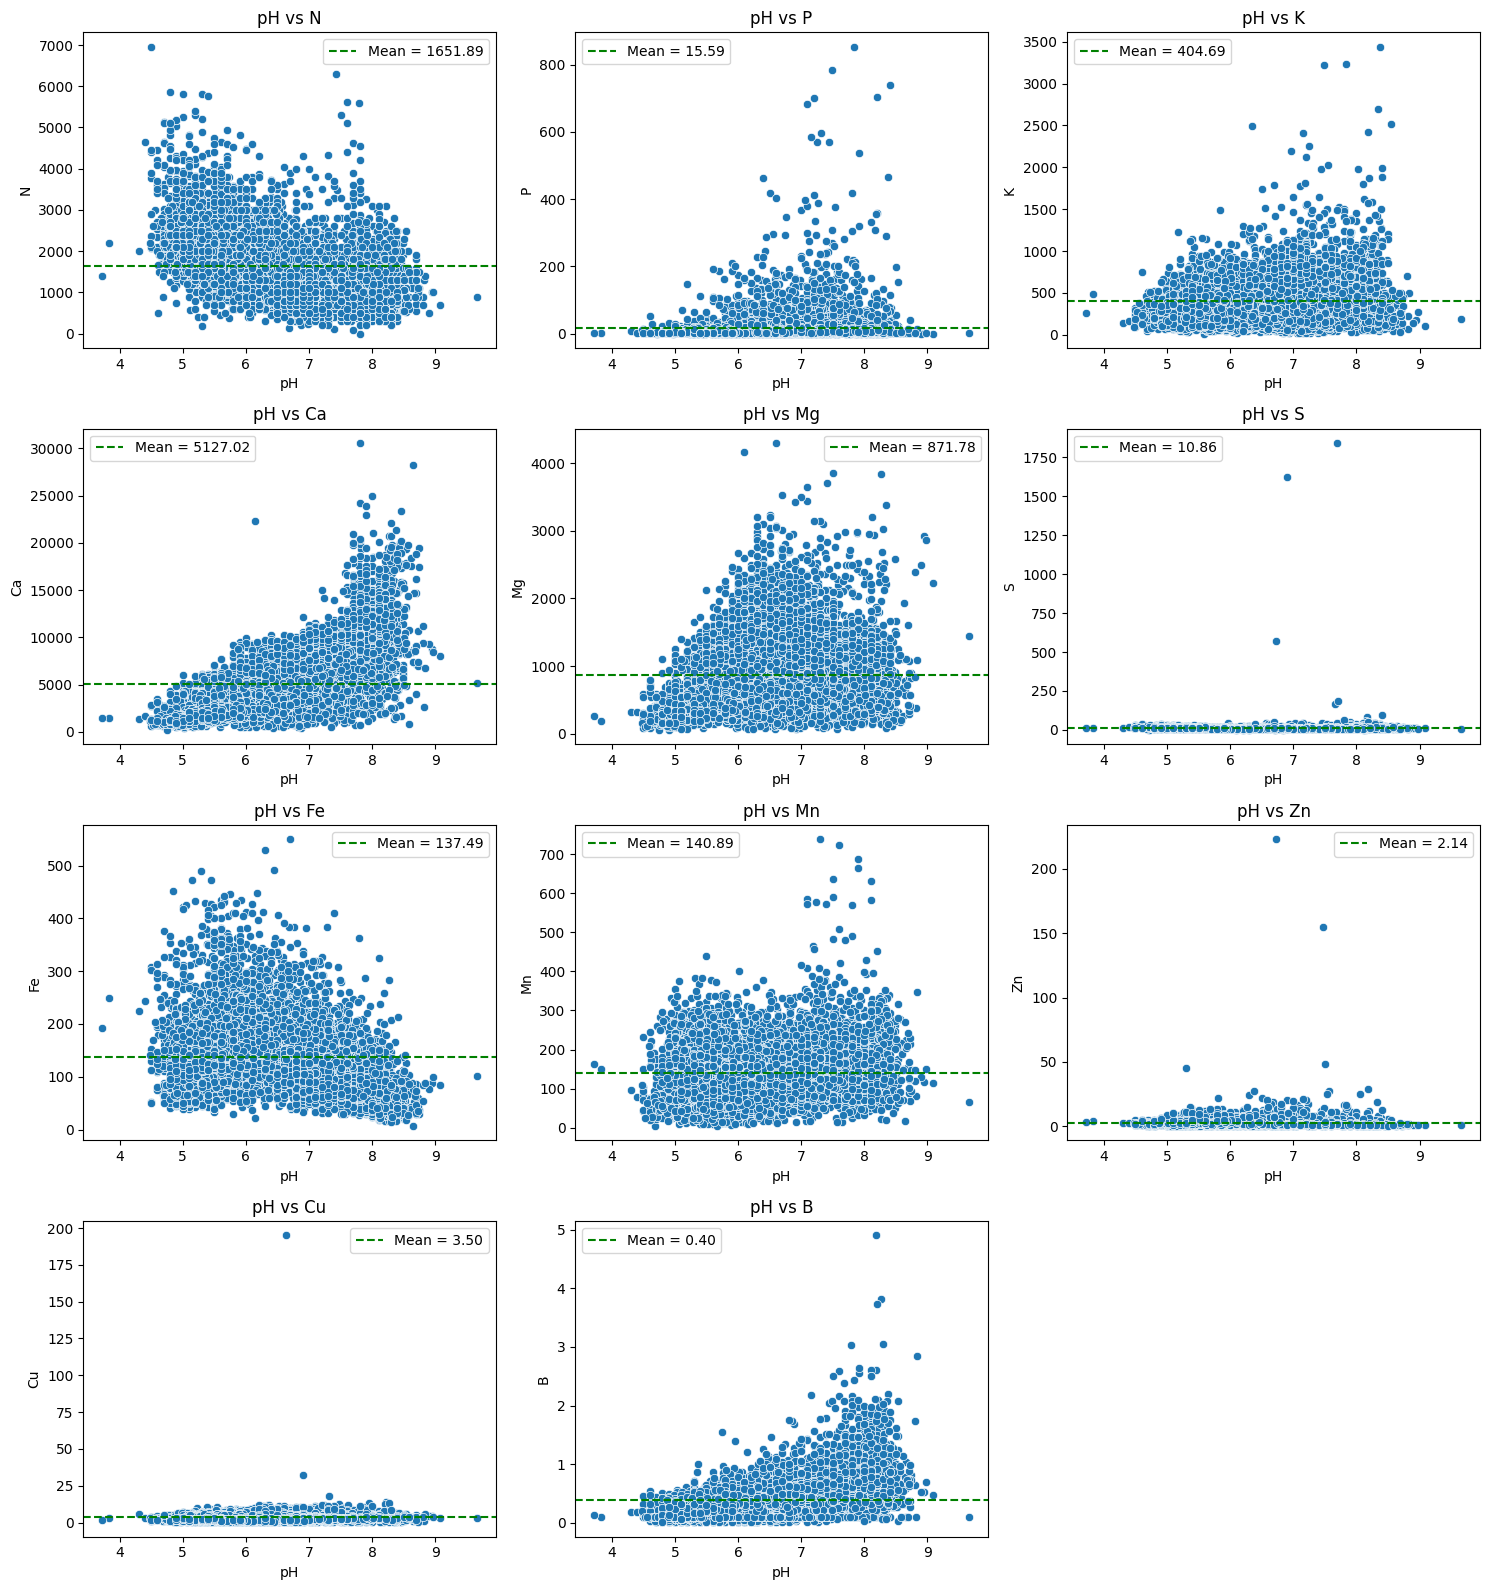

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'pH' 
n = len(target_columns)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[feature], y=df[nutrient])
    
    mean_val = df[nutrient].mean()
    plt.axhline(mean_val, color='green', linestyle='--', label=f'Mean = {mean_val:.2f}')
    
    plt.title(f'{feature} vs {nutrient}')
    plt.xlabel(feature)
    plt.ylabel(nutrient)
    plt.legend()

plt.tight_layout()
plt.savefig("pH vs Nutrients.png", dpi=300)
plt.show()


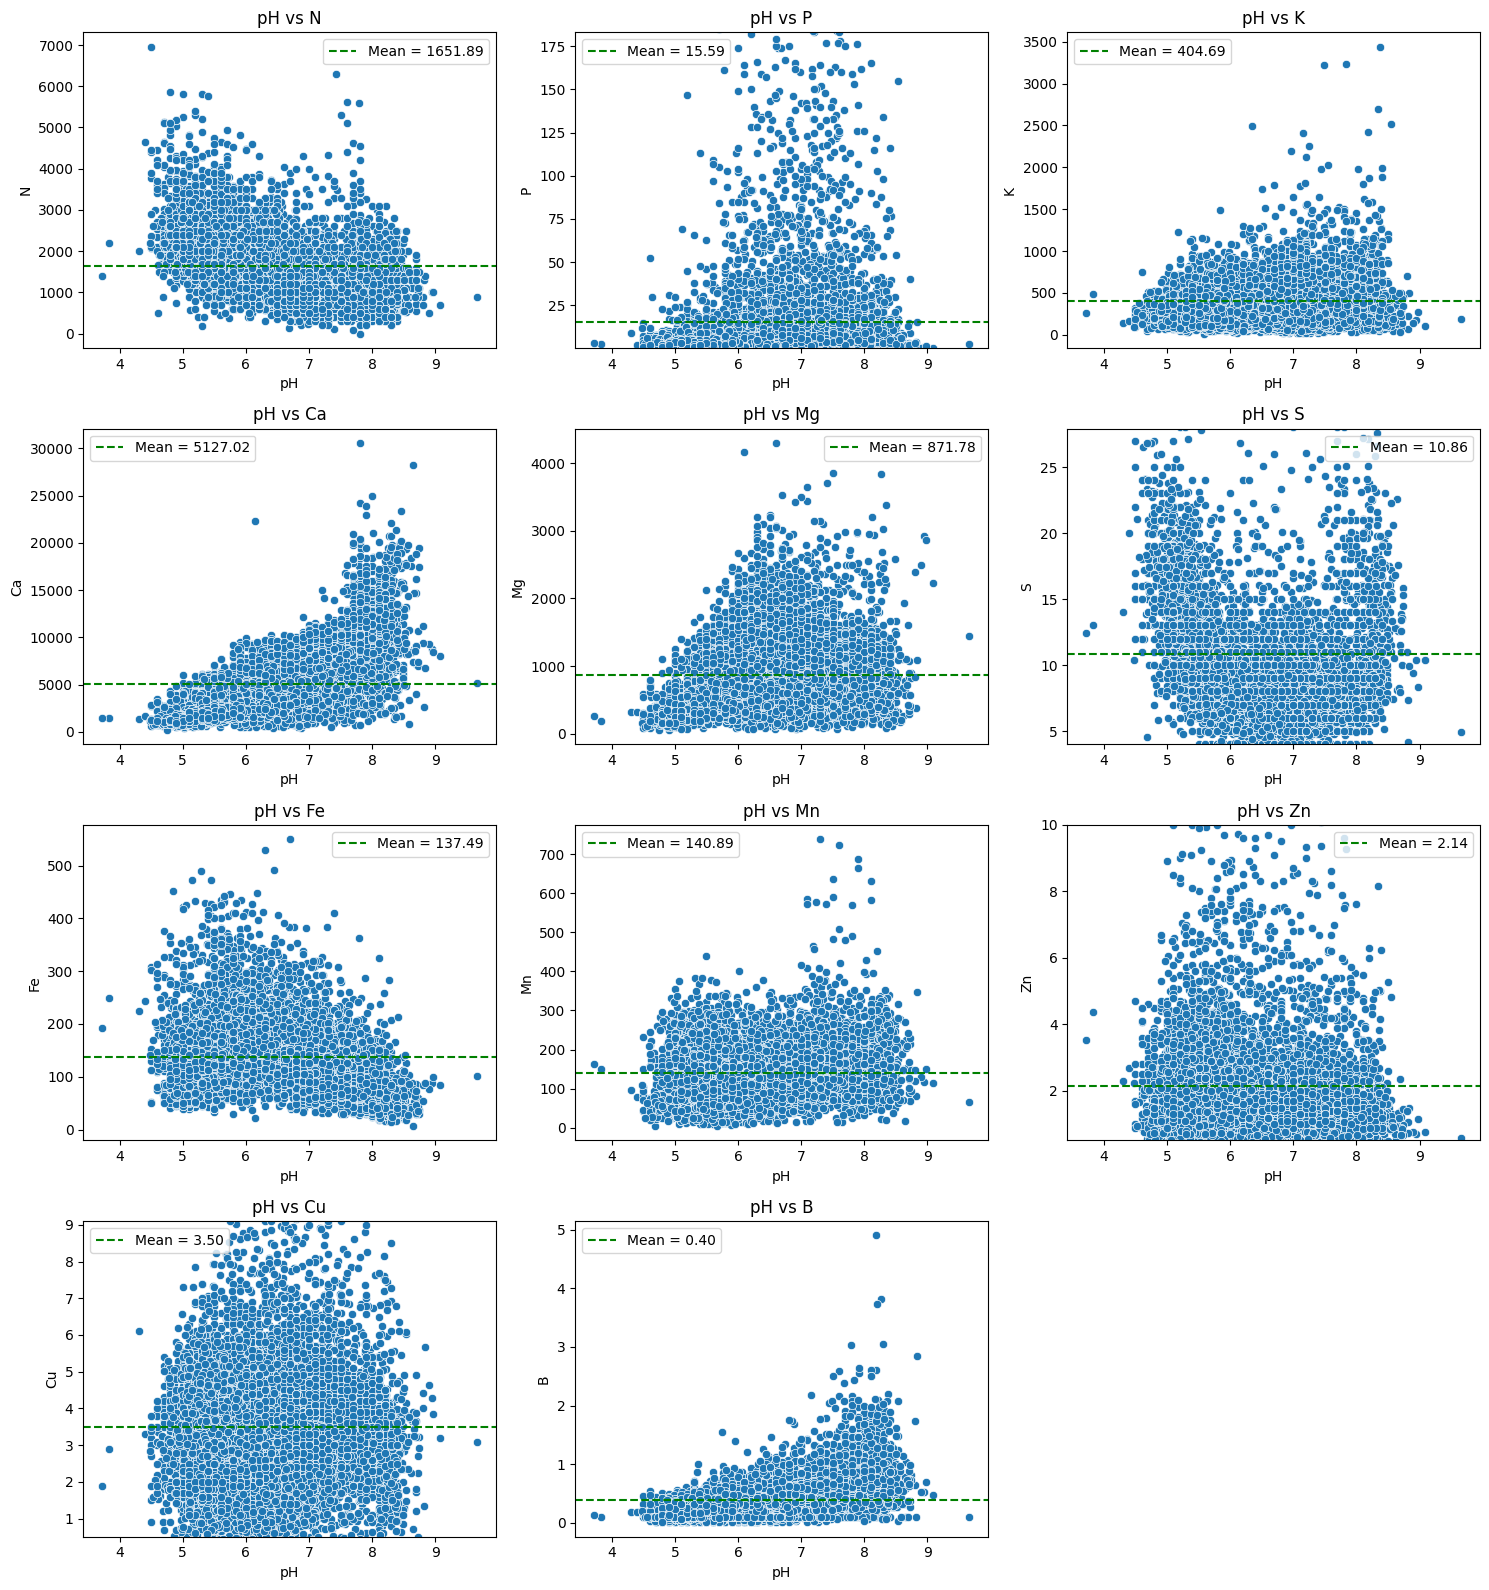

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'pH' 
zoom_targets = ['P', 'S', 'Cu', 'Zn']

n = len(target_columns)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, nutrient in enumerate(target_columns):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[feature], y=df[nutrient])
    
    mean_val = df[nutrient].mean()
    plt.axhline(mean_val, color='green', linestyle='--', label=f'Mean = {mean_val:.2f}')
    
    # Zoom y-axis for low variance nutrients
    if nutrient in zoom_targets:
        low, high = df[nutrient].quantile([0.01, 0.99])
        plt.ylim(low, high)
    
    plt.title(f'{feature} vs {nutrient}')
    plt.xlabel(feature)
    plt.ylabel(nutrient)
    plt.legend()

plt.tight_layout()
plt.savefig("pH vs Nutrients zoomed.png", dpi=300)
plt.show()


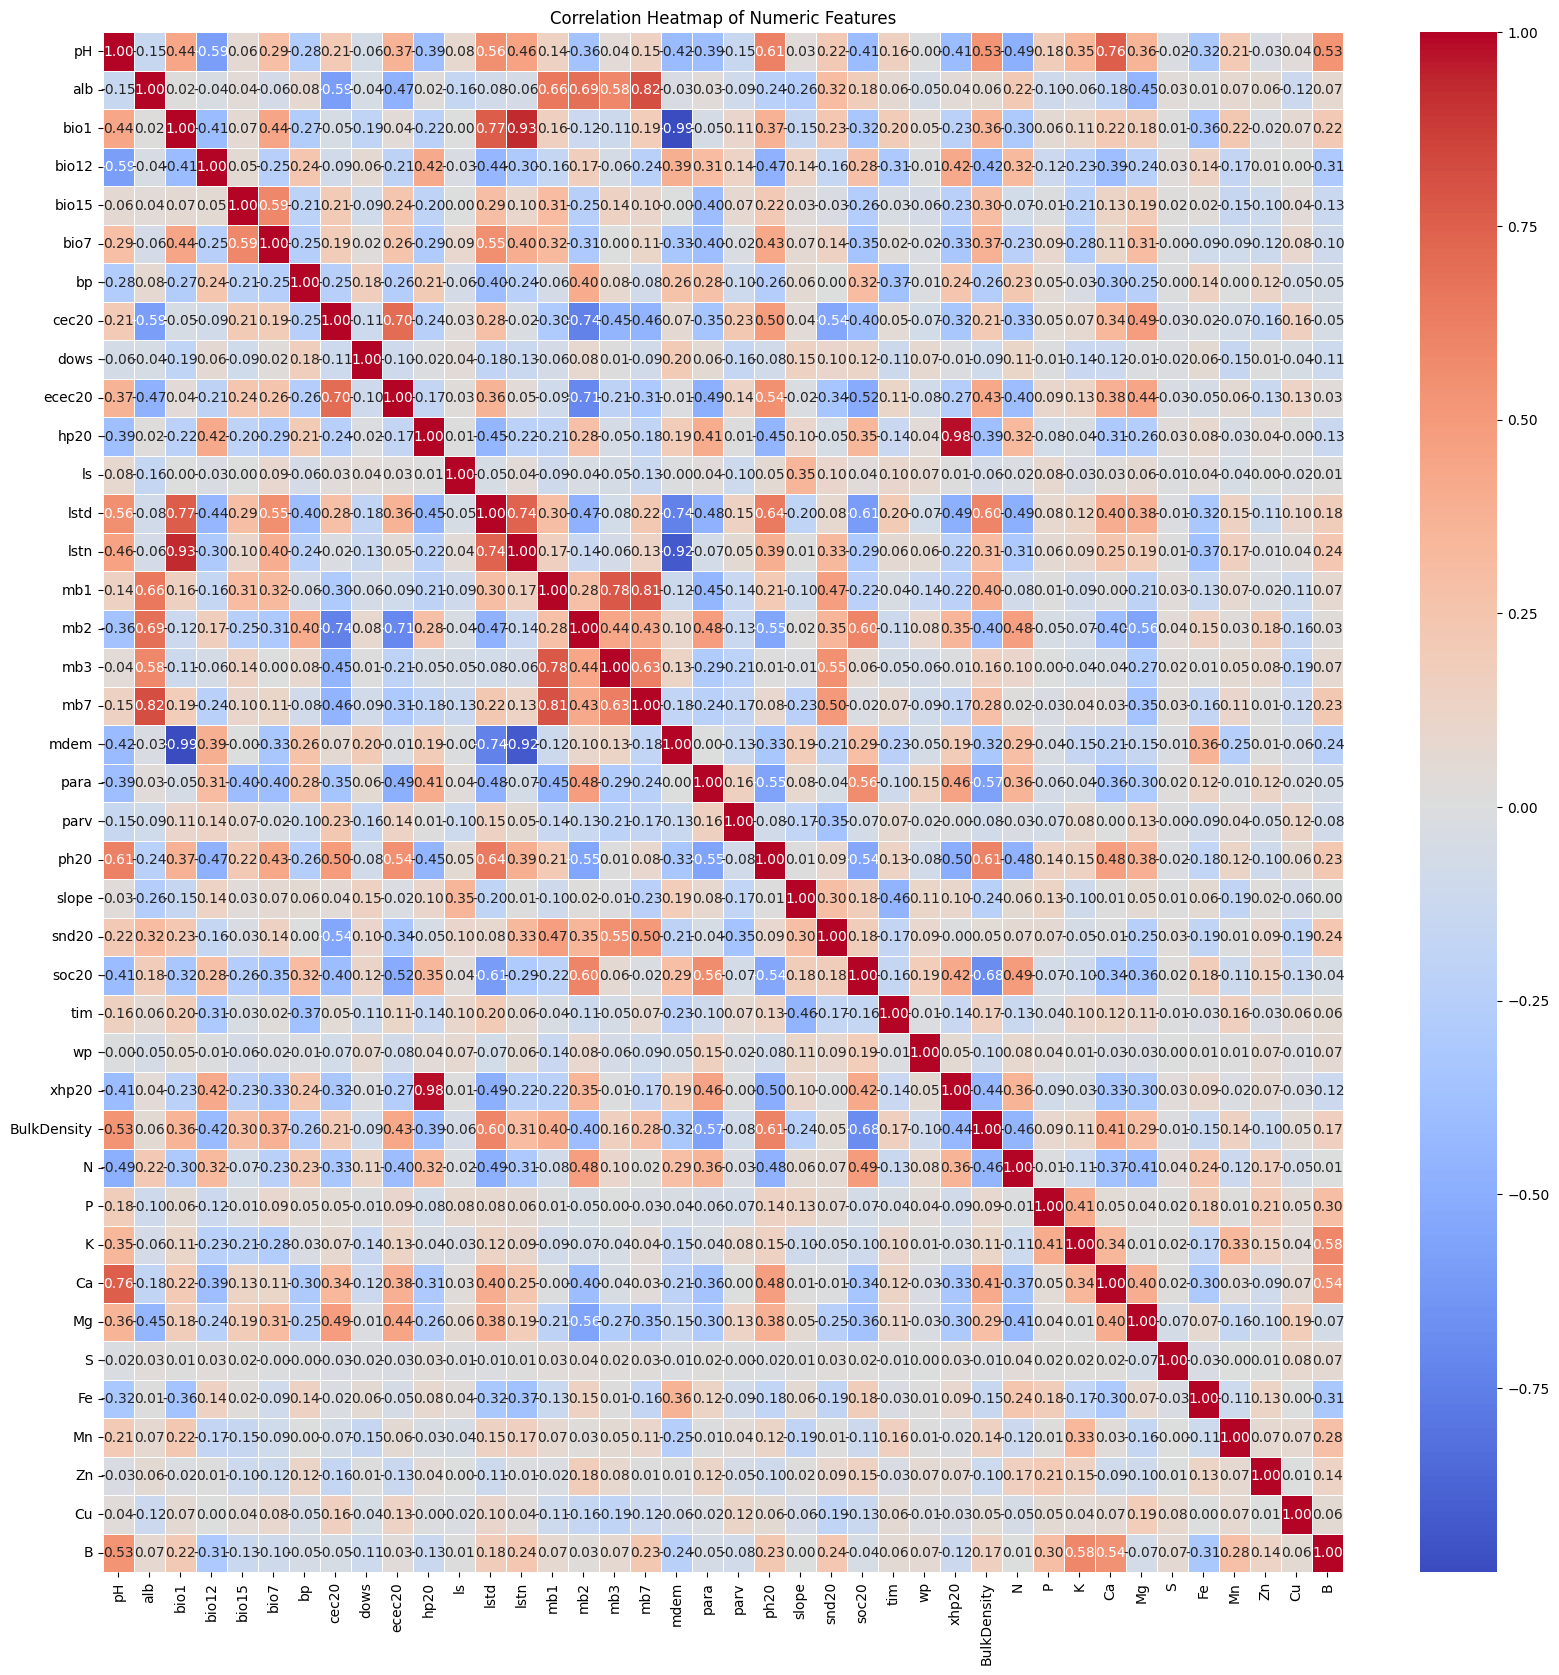

In [19]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
fig_size = (max(12, len(numeric_df.columns) / 2), max(8, len(numeric_df.columns) / 2))
plt.figure(figsize=fig_size)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig("heatmap_1.png", dpi=300)
plt.show()

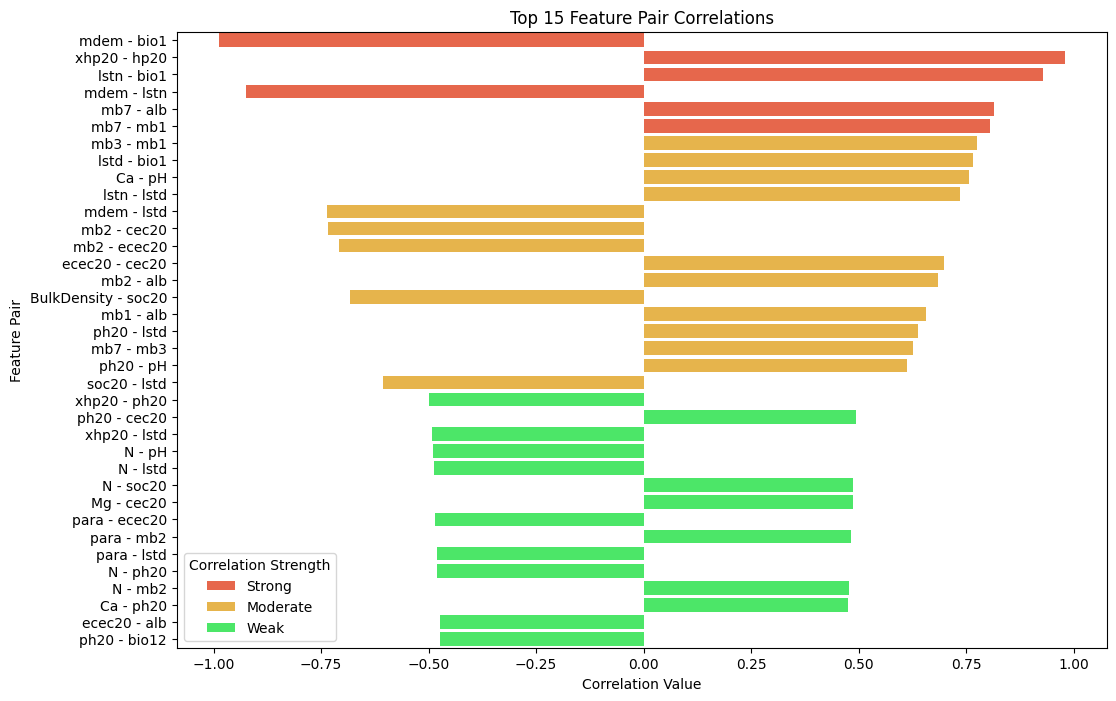

In [21]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if not mask[i, j]: 
            correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
correlations = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)
strong_threshold = 0.8
moderate_threshold = 0.5
strong_correlations = []
moderate_correlations = []
weak_correlations = []
for feature1, feature2, corr_value in correlations:
    if abs(corr_value) >= strong_threshold:
        strong_correlations.append((feature1, feature2, corr_value))
    elif abs(corr_value) >= moderate_threshold:
        moderate_correlations.append((feature1, feature2, corr_value))
    else:
        weak_correlations.append((feature1, feature2, corr_value))

top_n = 15 
all_correlations = strong_correlations[:top_n] + moderate_correlations[:top_n] + weak_correlations[:top_n]

categories = ['Strong', 'Moderate', 'Weak']
category_labels = ['Strong Correlation (>= 0.8)', 'Moderate Correlation (>= 0.5)', 'Weak Correlation (< 0.5)']
category_colors = ['#FF5733', '#FFBD33', '#33FF57']
feature_pairs = [f'{f1} - {f2}' for f1, f2, _ in all_correlations]
correlation_values = [corr for _, _, corr in all_correlations]
category_indices = ['Strong'] * len(strong_correlations[:top_n]) + ['Moderate'] * len(moderate_correlations[:top_n]) + ['Weak'] * len(weak_correlations[:top_n])
df_corr = pd.DataFrame({
    'Feature Pair': feature_pairs,
    'Correlation Value': correlation_values,
    'Category': category_indices
})

plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation Value', y='Feature Pair', data=df_corr, hue='Category', dodge=False, palette=category_colors)
plt.title(f'Top {top_n} Feature Pair Correlations')
plt.xlabel('Correlation Value')
plt.ylabel('Feature Pair')
plt.legend(title='Correlation Strength')
plt.savefig("top correlated features.png")
plt.show()


### Modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [16]:
X = df.drop(columns=target_columns)
y = df[target_columns]

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train = X_train.drop(columns=['PID'])
X_val = X_val.drop(columns=['PID'])

In [19]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=150, random_state=42,n_jobs=-1))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=150,
                                                     n_jobs=-1,
                                                     random_state=42))

In [20]:
y_pred = model.predict(X_val)

### Evaluation

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse_per_target = mean_squared_error(y_val, y_pred, multioutput='raw_values')
r2_per_target = r2_score(y_val, y_pred, multioutput='raw_values')

for i, (nutrient, mse, r2) in enumerate(zip(target_columns, mse_per_target, r2_per_target)):
    rmse = np.sqrt(mse)
    print(f"{nutrient}: RMSE = {rmse:.4f}, R² = {r2:.4f}")


N: RMSE = 489.5108, R² = 0.5765
P: RMSE = 43.9641, R² = 0.0204
K: RMSE = 200.5577, R² = 0.4288
Ca: RMSE = 1524.9356, R² = 0.8126
Mg: RMSE = 342.9817, R² = 0.6307
S: RMSE = 16.9760, R² = -0.1555
Fe: RMSE = 43.3256, R² = 0.5661
Mn: RMSE = 54.1135, R² = 0.4101
Zn: RMSE = 2.0130, R² = 0.0548
Cu: RMSE = 5.0317, R² = 0.0464
B: RMSE = 0.2336, R² = 0.5341


In [22]:
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f' RMSE: {rmse:.4f}')

 RMSE: 498.1753


##### There isn't much variation for P, S, Cu and Zn (we can see this with boxplots) that's why models fit them horribly.
##### When R² is negative or very close to 0 we can simply take the mean

### Satelite data

In [22]:
landsat = pd.read_csv(r'LANDSAT8_data_updated.csv')
landsat['date'] = pd.to_datetime(landsat['date'])
landsat.drop(columns=['lat', 'lon'], inplace=True)

In [23]:
modis_1 = pd.read_csv(r'MODIS_MOD09GA_data.csv')
modis_1['date'] = pd.to_datetime(modis_1['date'])
modis_1.drop(columns=['lat', 'lon'], inplace=True)

In [24]:
modis_2 = pd.read_csv(r'MODIS_MOD11A1_data.csv')
modis_2['date'] = pd.to_datetime(modis_2['date'])
modis_2.drop(columns=['lat', 'lon'], inplace=True)

In [25]:
modis_3 = pd.read_csv(r'MODIS_MOD16A2_data.csv')
modis_3['date'] = pd.to_datetime(modis_3['date'])
modis_3.drop(columns=['lat', 'lon'], inplace=True)

In [26]:
modis_4 = pd.read_csv(r'MODIS_MOD13Q1_data.csv')
modis_4['date'] = pd.to_datetime(modis_4['date'])
modis_4.drop(columns=['lat', 'lon'], inplace=True)

In [27]:
modis_5 = pd.read_csv(r'MODIS_MCD43A4_data.csv')
modis_5['date'] = pd.to_datetime(modis_5['date'])
modis_5.drop(columns=['lat', 'lon'], inplace=True)

In [28]:
sentinel_1 = pd.read_csv(r'Sentinel1_data.csv')
sentinel_1['date'] = pd.to_datetime(sentinel_1['date'])
sentinel_1.drop(columns=['lat', 'lon'], inplace=True)

In [29]:
sentinel_2 = pd.read_csv(r'Sentinel2_data.csv')
sentinel_2['date'] = pd.to_datetime(sentinel_2['date'])
sentinel_2.drop(columns=['lat', 'lon'], inplace=True)

In [30]:
landsat=pd.read_csv(r'LANDSAT8_data_updated.csv')
modis_1 = pd.read_csv(r'MODIS_MOD09GA_data.csv')
modis_2 = pd.read_csv(r'MODIS_MOD11A1_data.csv')
modis_3 = pd.read_csv(r'MODIS_MOD16A2_data.csv')
modis_4 = pd.read_csv(r'MODIS_MOD13Q1_data.csv')
modis_5 = pd.read_csv(r'MODIS_MCD43A4_data.csv')
sentinel_1 = pd.read_csv(r'Sentinel1_data.csv')
sentinel_2 = pd.read_csv(r'Sentinel2_data.csv')

In [31]:
satelites = [modis_1, modis_2, modis_3, modis_4, modis_5, sentinel_1, sentinel_2, landsat]
satelite_names = ['modis_1', 'modis_2', 'modis_3', 'modis_4', 'modis_5', 'sentinel_1', 'sentinel_2', 'landsat']

In [32]:
for satelite in satelites:
    satelite.drop(columns=['lat', 'lon'], inplace=True)
print("MODIS MOD09GA Columns:\n", modis_1.columns, "\n")
print("MODIS MOD11A1 Columns:\n", modis_2.columns, "\n")
print("MODIS MOD16A2 Columns:\n", modis_3.columns, "\n")
print("MODIS MOD13Q1 Columns:\n", modis_4.columns, "\n")
print("MODIS MCD43A4 Columns:\n", modis_5.columns, "\n")
print("Sentinel-1 Columns:\n", sentinel_1.columns, "\n")
print("Sentinel-2 Columns:\n", sentinel_2.columns, "\n")
print("landsat Columns:\n", landsat.columns, "\n")

MODIS MOD09GA Columns:
 Index(['date', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b04',
       'sur_refl_b05', 'sur_refl_b06', 'sur_refl_b07', 'PID'],
      dtype='object') 

MODIS MOD11A1 Columns:
 Index(['LST_Day_1km', 'LST_Night_1km', 'date', 'PID'], dtype='object') 

MODIS MOD16A2 Columns:
 Index(['ET', 'PET', 'date', 'PID'], dtype='object') 

MODIS MOD13Q1 Columns:
 Index(['EVI', 'NDVI', 'RelativeAzimuth', 'SolarZenith', 'ViewZenith', 'date',
       'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'PID'],
      dtype='object') 

MODIS MCD43A4 Columns:
 Index(['Nadir_Reflectance_Band1', 'Nadir_Reflectance_Band2',
       'Nadir_Reflectance_Band3', 'Nadir_Reflectance_Band4', 'date', 'PID'],
      dtype='object') 

Sentinel-1 Columns:
 Index(['VH', 'VV', 'date', 'instrumentMode', 'orbitProperties_pass',
       'relativeOrbitNumber_start', 'PID'],
      dtype='object') 

Sentinel-2 Columns:
 Index(['B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B

### Finding Missing Dates and Missing Values

#### Sample frequency regularity

In [33]:
for satelite, satelite_name in zip(satelites, satelite_names):
    satelite['date'] = pd.to_datetime(satelite['date'])  
    unique_dates = pd.Series(satelite['date'].sort_values().unique()) 
    
    diffs = unique_dates.diff().dropna().reset_index(drop=True)  
    day_diffs = diffs.dt.days 

    freq_counts = day_diffs.value_counts(normalize=True) 
    freq_percentage = (freq_counts * 100).round(2).to_dict() 
    
    frequency_days = day_diffs.mode()[0] 
    frequency = f"{frequency_days}D"
    
    first_date = unique_dates.iloc[0]
    last_date = unique_dates.iloc[-1]
    expected_dates = pd.date_range(start=first_date, end=last_date, freq=frequency)
    unique_dates_np = unique_dates.values.astype('datetime64[D]')
    
    missing_dates = []
    if frequency_days == 1:

        missing_dates = list(set(expected_dates) - set(unique_dates))
    else:

        for expected_date in expected_dates:
            expected_date_np = np.datetime64(expected_date)
            diff = abs(unique_dates_np - expected_date_np)
            if not (diff <= np.timedelta64(1, 'D')).any():
                missing_dates.append(expected_date)
    
    formatted_dates = [d.strftime("%Y-%m-%d") for d in sorted(missing_dates)]
    
    print(f"{satelite_name}\nEstimated frequency: every {frequency_days} days")
    print(f"Start date: {first_date} \nEnd date : {last_date}")  
    print(f"Missing dates : {len(missing_dates)} out of {len(expected_dates)}")
    #print(f"expected dates: {formatted_dates}")
    print(f"Sampling frequency percentages (days: %): {freq_percentage}")
    print("—" * 150)


modis_1
Estimated frequency: every 1 days
Start date: 2017-01-01 00:00:00 
End date : 2019-12-30 00:00:00
Missing dates : 10 out of 1094
Sampling frequency percentages (days: %): {1: 99.82, 10: 0.09, 2: 0.09}
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
modis_2
Estimated frequency: every 1 days
Start date: 2017-01-01 00:00:00 
End date : 2019-12-30 00:00:00
Missing dates : 46 out of 1094
Sampling frequency percentages (days: %): {1: 96.66, 2: 3.06, 3: 0.19, 11: 0.1}
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
modis_3
Estimated frequency: every 8 days
Start date: 2017-01-01 00:00:00 
End date : 2019-12-27 00:00:00
Missing dates : 91 out of 137
Sampling frequency percentages (days: %): {8: 97.81, 7: 0.73, 6: 0.73, 5: 0.73}
————————————————————————————————————————————————————————

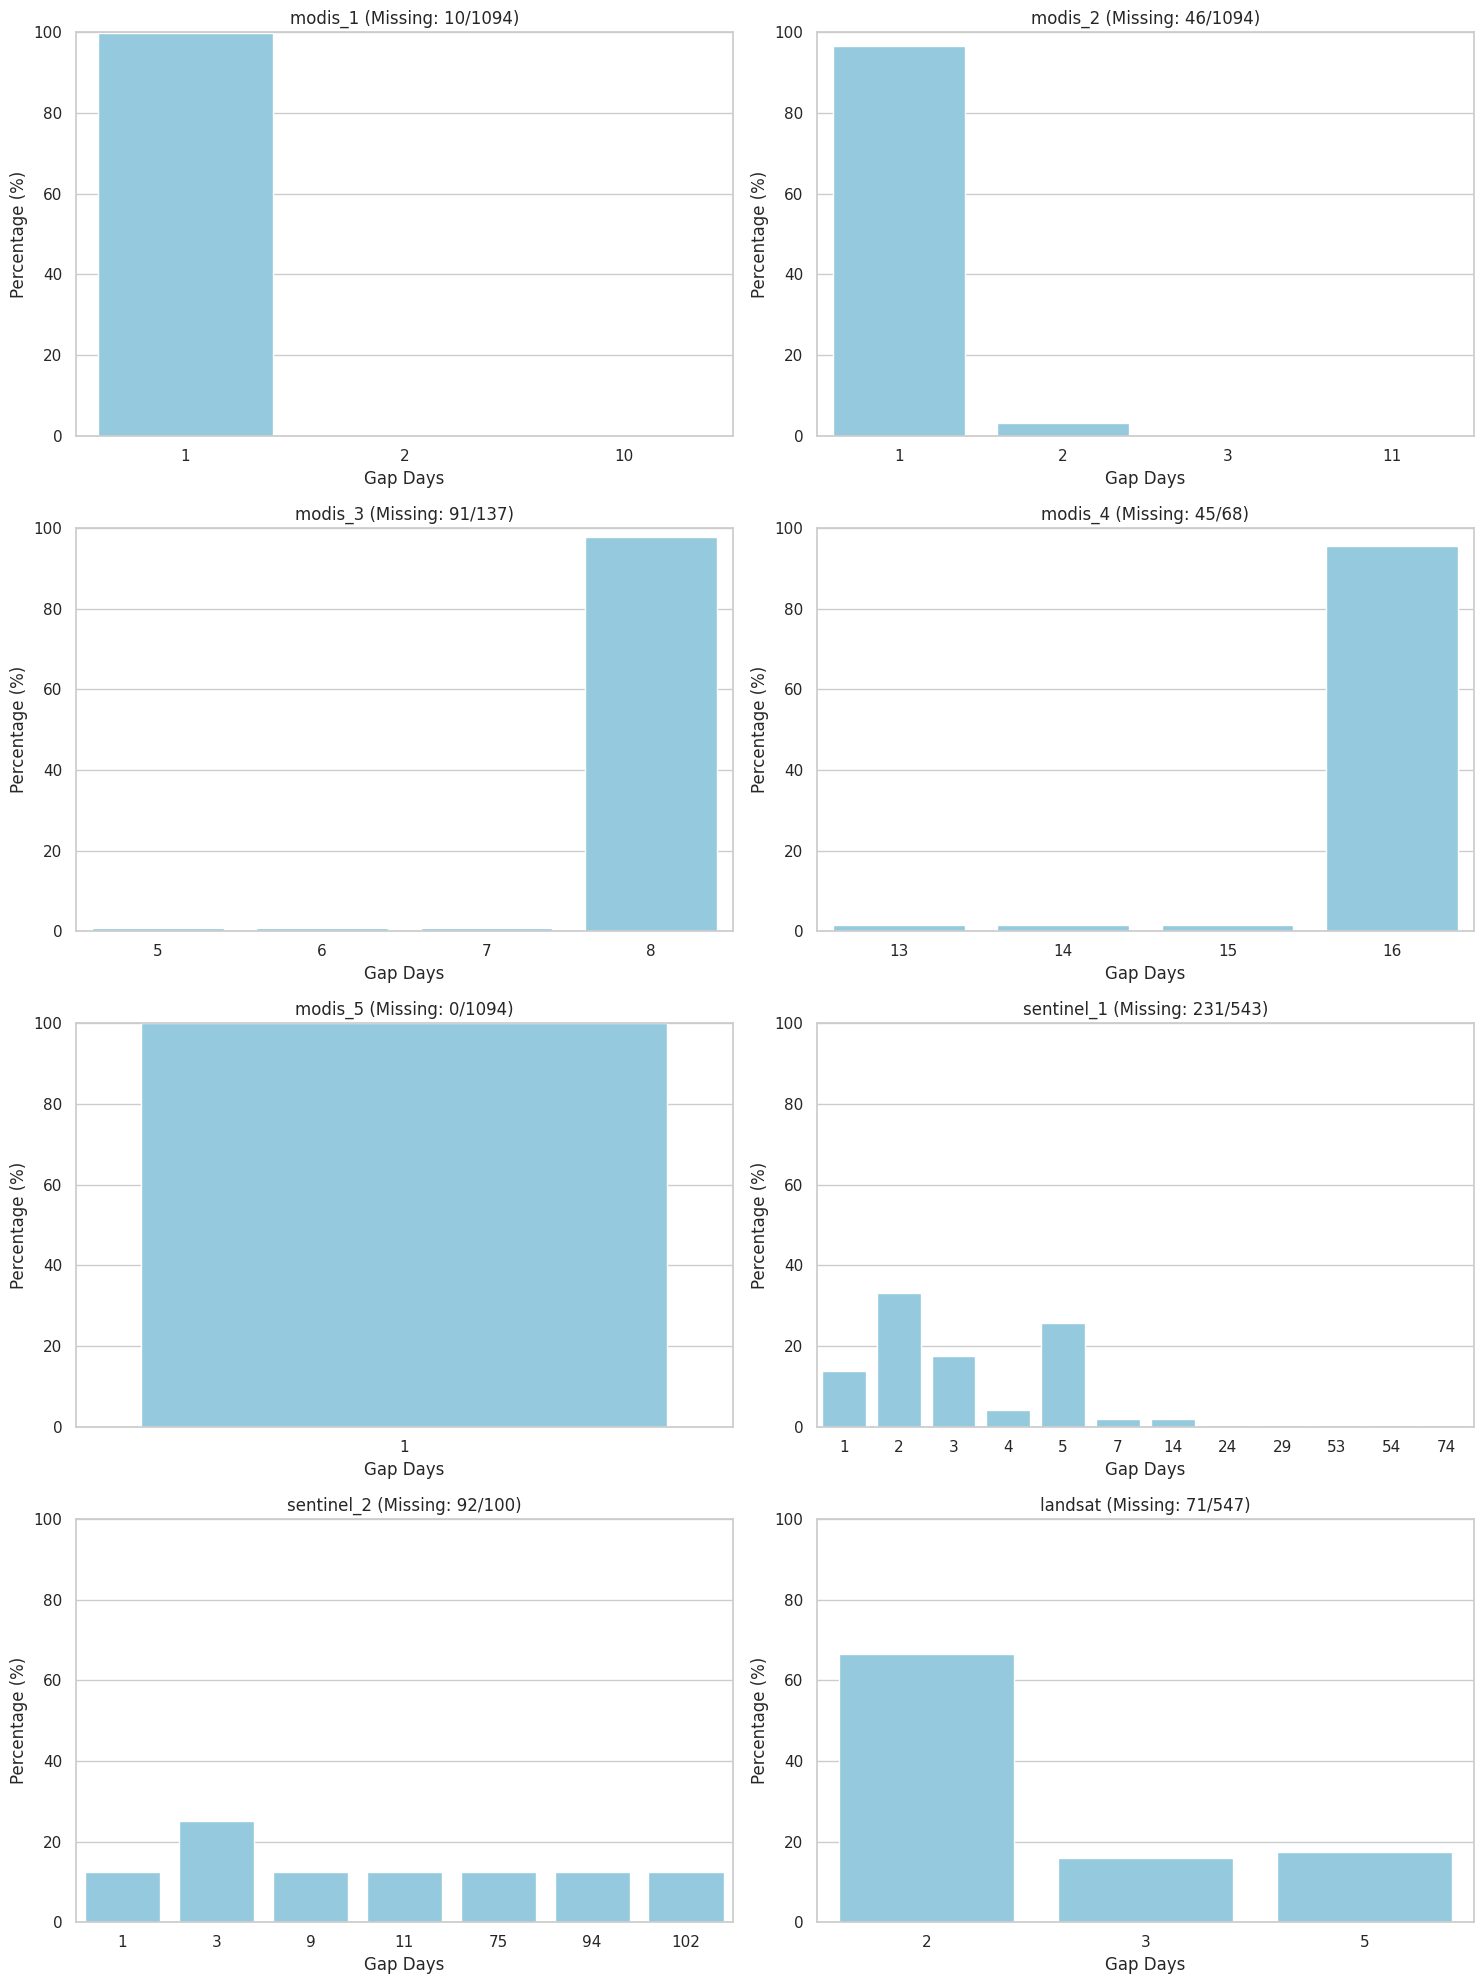

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your summarized data
data = [
    {
        "name": "modis_1",
        "frequency_days": 1,
        "missing_dates": 10,
        "total_dates": 1094,
        "freq_percentage": {1: 99.82, 10: 0.09, 2: 0.09}
    },
    {
        "name": "modis_2",
        "frequency_days": 1,
        "missing_dates": 46,
        "total_dates": 1094,
        "freq_percentage": {1: 96.66, 2: 3.06, 3: 0.19, 11: 0.1}
    },
    {
        "name": "modis_3",
        "frequency_days": 8,
        "missing_dates": 91,
        "total_dates": 137,
        "freq_percentage": {8: 97.81, 7: 0.73, 6: 0.73, 5: 0.73}
    },
    {
        "name": "modis_4",
        "frequency_days": 16,
        "missing_dates": 45,
        "total_dates": 68,
        "freq_percentage": {16: 95.59, 15: 1.47, 14: 1.47, 13: 1.47}
    },
    {
        "name": "modis_5",
        "frequency_days": 1,
        "missing_dates": 0,
        "total_dates": 1094,
        "freq_percentage": {1: 100.0}
    },
    {
        "name": "sentinel_1",
        "frequency_days": 2,
        "missing_dates": 231,
        "total_dates": 543,
        "freq_percentage": {2: 33.21, 5: 25.75, 3: 17.54, 1: 13.81, 4: 4.1, 14: 1.87, 7: 1.87, 54: 0.37, 24: 0.37, 53: 0.37, 29: 0.37, 74: 0.37}
    },
    {
        "name": "sentinel_2",
        "frequency_days": 3,
        "missing_dates": 92,
        "total_dates": 100,
        "freq_percentage": {3: 25.0, 94: 12.5, 11: 12.5, 102: 12.5, 75: 12.5, 1: 12.5, 9: 12.5}
    },
    {
        "name": "landsat",
        "frequency_days": 2,
        "missing_dates": 71,
        "total_dates": 547,
        "freq_percentage": {2: 66.58, 5: 17.44, 3: 15.97}
    },
]

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, sat in enumerate(data):
    ax = axes[i]
    # Barplot for frequency distribution
    days = list(sat["freq_percentage"].keys())
    percentages = list(sat["freq_percentage"].values())
    sns.barplot(x=days, y=percentages, ax=ax, color='skyblue')
    ax.set_title(f"{sat['name']} (Missing: {sat['missing_dates']}/{sat['total_dates']})")
    ax.set_xlabel("Gap Days")
    ax.set_ylabel("Percentage (%)")
    ax.set_ylim(0, 100)

plt.tight_layout()
plt.savefig("satellite_sampling_frequencies.png", dpi=300)
plt.show()


In [36]:
for satelite, satelite_name in zip(satelites, satelite_names):
    missing_pids_df = set(df['PID']) - set(satelite['PID'])
    print(f"PIDs in df but missing from {satelite_name}: {len(missing_pids_df)}")

    '''missing_pids_test = set(test_df['PID']) - set(satelite['PID'])
    print(f"PIDs in test_df but missing from {satelite_name}: {len(missing_pids_test)}")

    print('-'*100)'''

PIDs in df but missing from modis_1: 61
PIDs in df but missing from modis_2: 1703
PIDs in df but missing from modis_3: 1703
PIDs in df but missing from modis_4: 769
PIDs in df but missing from modis_5: 769
PIDs in df but missing from sentinel_1: 0
PIDs in df but missing from sentinel_2: 5167
PIDs in df but missing from landsat: 3


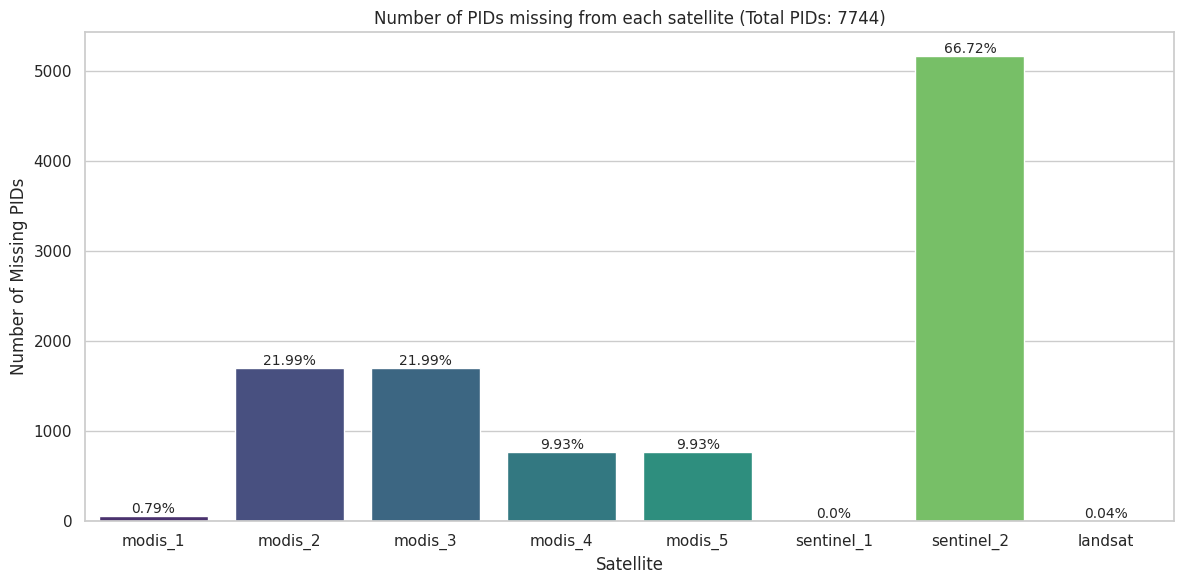

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your reported numbers
pid_data = [
    {"name": "modis_1", "missing_pids": 61},
    {"name": "modis_2", "missing_pids": 1703},
    {"name": "modis_3", "missing_pids": 1703},
    {"name": "modis_4", "missing_pids": 769},
    {"name": "modis_5", "missing_pids": 769},
    {"name": "sentinel_1", "missing_pids": 0},
    {"name": "sentinel_2", "missing_pids": 5167},
    {"name": "landsat", "missing_pids": 3},
]

# If you know the total PIDs, set it here to show percentage:
total_pids = len(set(df['PID']))  # Example: or just hardcode, e.g., total_pids = 7744

# Build data for plotting
sat_names = [d["name"] for d in pid_data]
missing_counts = [d["missing_pids"] for d in pid_data]
missing_percent = [round((m / total_pids) * 100, 2) for m in missing_counts]

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=sat_names, y=missing_counts, palette="viridis")

for bar, pct in zip(bars.patches, missing_percent):
    height = bar.get_height()
    bars.annotate(f"{pct}%", (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=10)

plt.title(f"Number of PIDs missing from each satellite (Total PIDs: {total_pids})")
plt.ylabel("Number of Missing PIDs")
plt.xlabel("Satellite")
plt.tight_layout()
plt.savefig("satellite_missing_pids.png", dpi=300)
plt.show()


In [38]:
modis_1.rename(columns={'sur_refl_b01': 'sur_refl_b01_MOD9',
                        'sur_refl_b02': 'sur_refl_b02_MOD9',
                       'sur_refl_b03': 'sur_refl_b03_MOD9',
                       'sur_refl_b04': 'sur_refl_b04_MOD9',
                        'sur_refl_b05': 'sur_refl_b05_MOD9',
                       'sur_refl_b06': 'sur_refl_b06_MOD9',
                        'sur_refl_b07': 'sur_refl_b07_MOD9'}, inplace=True)
modis_4.rename(columns={'sur_refl_b01': 'sur_refl_b01_MOD13',
                        'sur_refl_b02': 'sur_refl_b02_MOD13',
                       'sur_refl_b03': 'sur_refl_b03_MOD13',
                        'sur_refl_b07': 'sur_refl_b07_MOD13'}, inplace=True)

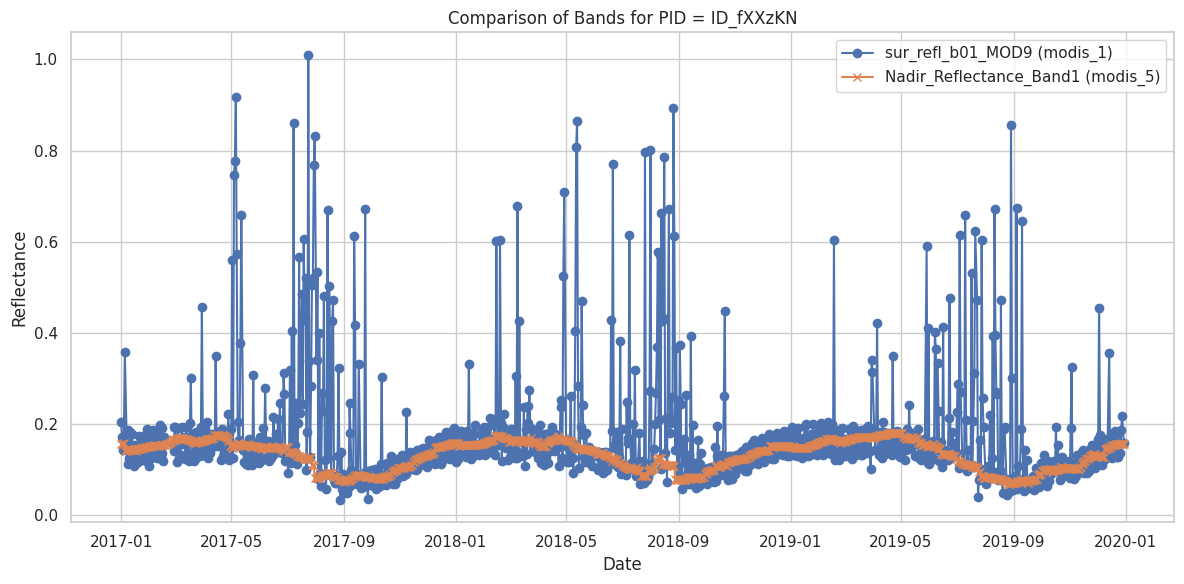

In [40]:
import matplotlib.pyplot as plt

your_pid = df['PID'][200] 


modis_1_pid = modis_1[modis_1['PID'] == your_pid].sort_values('date')
modis_5_pid = modis_5[modis_5['PID'] == your_pid].sort_values('date')


modis_1_pid['date'] = pd.to_datetime(modis_1_pid['date'])
modis_5_pid['date'] = pd.to_datetime(modis_5_pid['date'])


plt.figure(figsize=(12, 6))
plt.plot(modis_1_pid['date'], modis_1_pid['sur_refl_b01_MOD9'], label='sur_refl_b01_MOD9 (modis_1)', marker='o')
plt.plot(modis_5_pid['date'], modis_5_pid['Nadir_Reflectance_Band1'], label='Nadir_Reflectance_Band1 (modis_5)', marker='x')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title(f'Comparison of Bands for PID = {your_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sur_refl_modis_1 vs sur_refl_modis_5 (same pid).png", dpi=300)
plt.show()

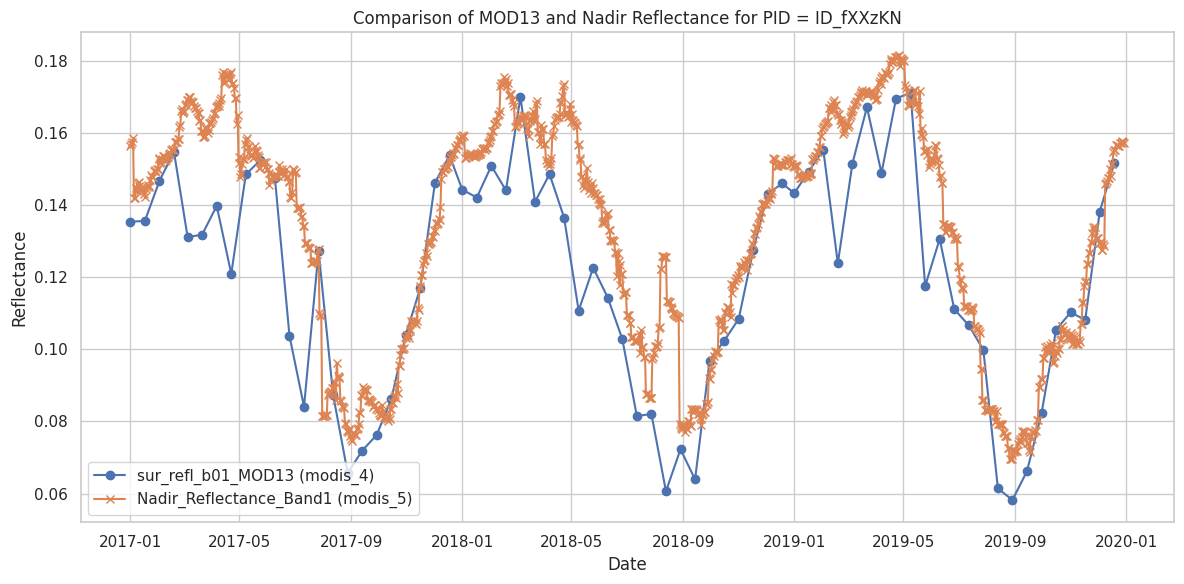

In [42]:
your_pid = df['PID'][200] 

modis_4_pid = modis_4[modis_4['PID'] == your_pid].sort_values('date')
modis_5_pid = modis_5[modis_5['PID'] == your_pid].sort_values('date')


modis_4_pid['date'] = pd.to_datetime(modis_4_pid['date'])
modis_5_pid['date'] = pd.to_datetime(modis_5_pid['date'])


plt.figure(figsize=(12, 6))
plt.plot(modis_4_pid['date'], modis_4_pid['sur_refl_b01_MOD13'], label='sur_refl_b01_MOD13 (modis_4)', marker='o')
plt.plot(modis_5_pid['date'], modis_5_pid['Nadir_Reflectance_Band1'], label='Nadir_Reflectance_Band1 (modis_5)', marker='x')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title(f'Comparison of MOD13 and Nadir Reflectance for PID = {your_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig("Comparison of MOD13 and Nadir Reflectance for PID.png", dpi=300)
plt.show()

#### b01 to b04 are best taken from modis_5 (more stable)

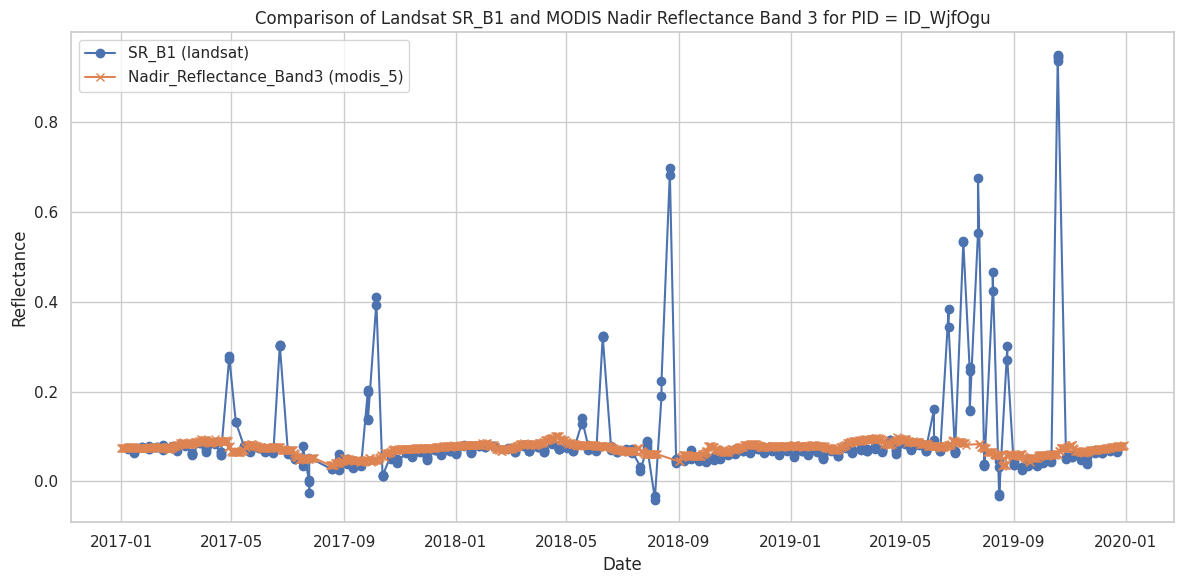

In [43]:
your_pid = df['PID'][178] 

landsat_pid = landsat[landsat['PID'] == your_pid].sort_values('date')
modis_5_pid = modis_5[modis_5['PID'] == your_pid].sort_values('date')


landsat_pid['date'] = pd.to_datetime(landsat_pid['date'])
modis_5_pid['date'] = pd.to_datetime(modis_5_pid['date'])


plt.figure(figsize=(12, 6))
plt.plot(landsat_pid['date'], landsat_pid['SR_B1'], label='SR_B1 (landsat)', marker='o')
plt.plot(modis_5_pid['date'], modis_5_pid['Nadir_Reflectance_Band3'], label='Nadir_Reflectance_Band3 (modis_5)', marker='x')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title(f'Comparison of Landsat SR_B1 and MODIS Nadir Reflectance Band 3 for PID = {your_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Comparison of Landsat SR_B1 and MODIS Nadir Reflectance Band 3.png", dpi=300)
plt.show()

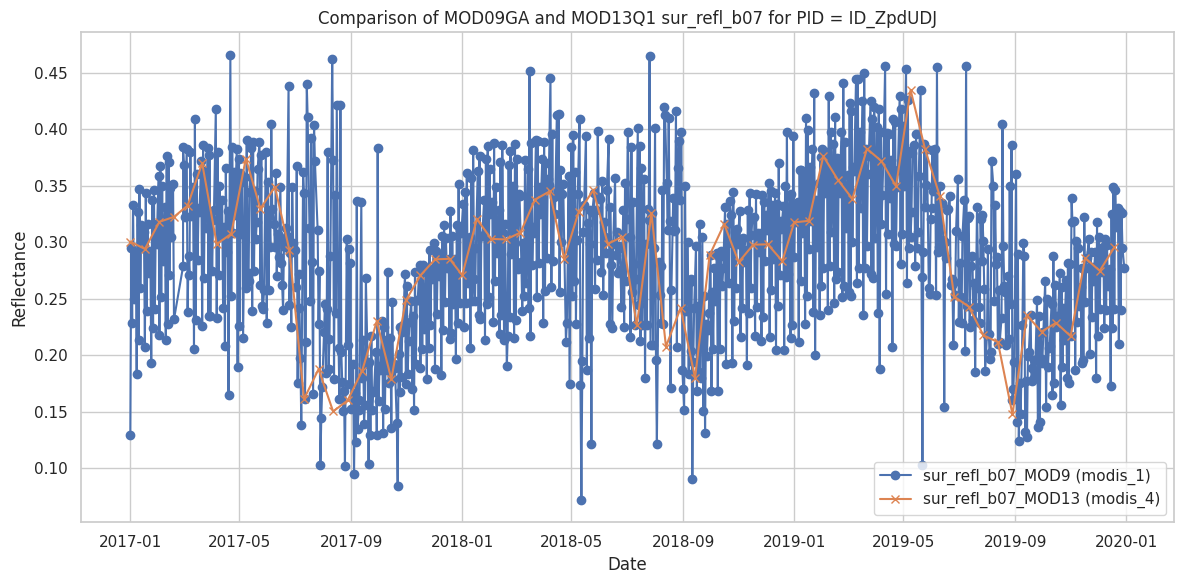

In [44]:
import matplotlib.pyplot as plt


your_pid = df['PID'][100]


modis_1_pid = modis_1[modis_1['PID'] == your_pid].sort_values('date')
modis_4_pid = modis_4[modis_4['PID'] == your_pid].sort_values('date')


modis_1_pid['date'] = pd.to_datetime(modis_1_pid['date'])
modis_4_pid['date'] = pd.to_datetime(modis_4_pid['date'])

plt.figure(figsize=(12, 6))
plt.plot(modis_1_pid['date'], modis_1_pid['sur_refl_b07_MOD9'], label='sur_refl_b07_MOD9 (modis_1)', marker='o')
plt.plot(modis_4_pid['date'], modis_4_pid['sur_refl_b07_MOD13'], label='sur_refl_b07_MOD13 (modis_4)', marker='x')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title(f'Comparison of MOD09GA and MOD13Q1 sur_refl_b07 for PID = {your_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Comparison of MOD09GA and MOD13Q1 sur_refl_b07.png", dpi=300)
plt.show()


#### b07 is best taken from modis_4 (more stable, not as noisy)

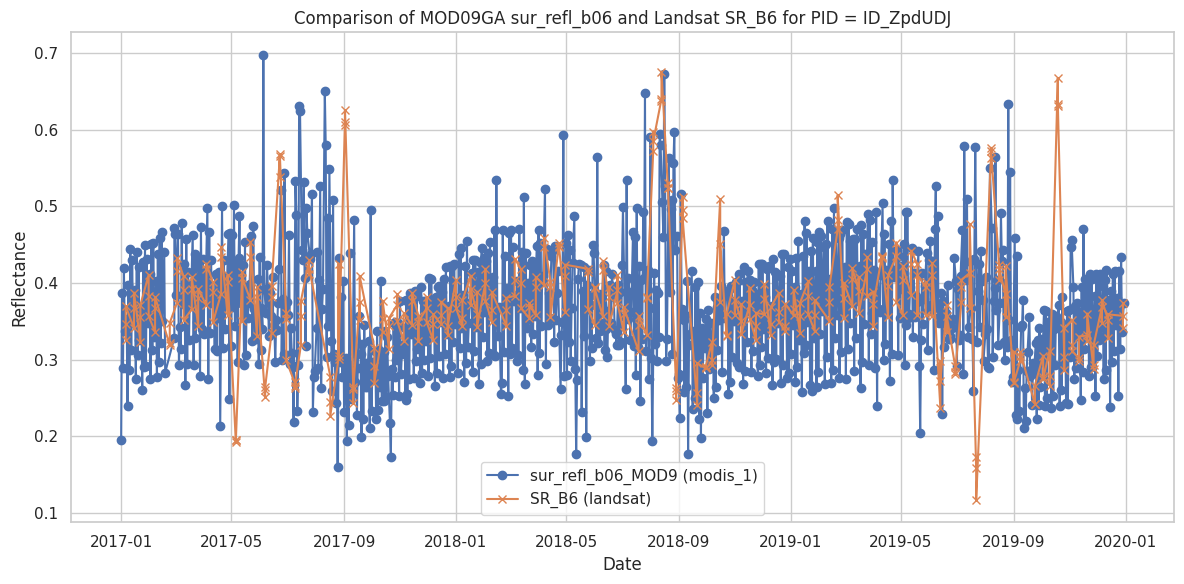

In [45]:
import matplotlib.pyplot as plt


your_pid = df['PID'].iloc[100] 


modis_1_pid = modis_1[modis_1['PID'] == your_pid].sort_values('date')
landsat_pid = landsat[landsat['PID'] == your_pid].sort_values('date')


modis_1_pid['date'] = pd.to_datetime(modis_1_pid['date'])
landsat_pid['date'] = pd.to_datetime(landsat_pid['date'])

plt.figure(figsize=(12, 6))
plt.plot(modis_1_pid['date'], modis_1_pid['sur_refl_b06_MOD9'], label='sur_refl_b06_MOD9 (modis_1)', marker='o')
plt.plot(landsat_pid['date'], landsat_pid['SR_B6'], label='SR_B6 (landsat)', marker='x')
plt.xlabel('Date')
plt.ylabel('Reflectance')
plt.title(f'Comparison of MOD09GA sur_refl_b06 and Landsat SR_B6 for PID = {your_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Comparison of MOD09GA sur_refl_b06 and Landsat SR_B6.png", dpi=300)
plt.show()


### Creating a comprehensive satelite dataset

In [47]:
# Load datasets
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
train_gap_df = pd.read_csv('Gap_Train.csv')
test_gap_df = pd.read_csv('Gap_Test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

In [48]:
satelite_df=pd.DataFrame()
satelite_test_df=pd.DataFrame()

In [49]:
satelite_df['PID']=df['PID']
satelite_test_df['PID']=test_df['PID']

In [50]:
date_range = pd.date_range(start='2017-01-01', end='2019-12-31', freq='D')
def expand_with_dates(df, date_range):
    return (
        df[['PID']]
        .drop_duplicates()
        .assign(key=1)
        .merge(pd.DataFrame({'date': date_range, 'key': 1}), on='key')
        .drop(columns='key')
        .sort_values(['PID', 'date'])
        .reset_index(drop=True)
    )
satelite_df = expand_with_dates(satelite_df, date_range)
satelite_test_df = expand_with_dates(satelite_test_df, date_range)


In [51]:
satelite_df = satelite_df.merge(
    modis_5, on=['PID', 'date'], how='left'
)

In [52]:
satelite_test_df = satelite_test_df.merge(
    modis_5, on=['PID', 'date'], how='left'
)

In [53]:
satelite_df.rename(columns={
    'Nadir_Reflectance_Band1': 'b01',
   'Nadir_Reflectance_Band2': 'b02',
   'Nadir_Reflectance_Band3': 'b03',
    'Nadir_Reflectance_Band4': 'b04'
}, inplace=True)

In [54]:
satelite_df.columns

Index(['PID', 'date', 'b01', 'b02', 'b03', 'b04'], dtype='object')

In [55]:
landsat.columns

Index(['QA_PIXEL', 'QA_RADSAT', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5',
       'SR_B6', 'SR_B7', 'ST_B10', 'date', 'PID'],
      dtype='object')

In [56]:
landsat.columns

Index(['QA_PIXEL', 'QA_RADSAT', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5',
       'SR_B6', 'SR_B7', 'ST_B10', 'date', 'PID'],
      dtype='object')

In [57]:

modis_5_pids = set(modis_5['PID'])
df_pids = set(df['PID'])
test_pids = set(test_df['PID'])


print("Total PIDs in modis_5:", len(modis_5_pids))


pids_in_df_and_modis5 = df_pids.intersection(modis_5_pids)
print("PIDs in both df and modis_5:", len(pids_in_df_and_modis5))


pids_in_test_and_modis5 = test_pids.intersection(modis_5_pids)
print("PIDs in both test_df and modis_5:", len(pids_in_test_and_modis5))


combined_df_test_pids = df_pids.union(test_pids)
pids_only_in_modis5 = modis_5_pids - combined_df_test_pids
print("PIDs in modis_5 but not in df or test_df:", len(pids_only_in_modis5))


Total PIDs in modis_5: 9124
PIDs in both df and modis_5: 6975
PIDs in both test_df and modis_5: 2149
PIDs in modis_5 but not in df or test_df: 0


In [58]:
landsat.columns

Index(['QA_PIXEL', 'QA_RADSAT', 'SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5',
       'SR_B6', 'SR_B7', 'ST_B10', 'date', 'PID'],
      dtype='object')

In [59]:

landsat_pids = set(landsat['PID'])
df_pids = set(df['PID'])
test_pids = set(test_df['PID'])

print("Total PIDs in landsat:", len(landsat_pids))


pids_in_df_and_landsat = df_pids.intersection(landsat_pids)
print("PIDs in both df and landsat:", len(pids_in_df_and_landsat))

pids_in_test_and_landsat = test_pids.intersection(landsat_pids)
print("PIDs in both test_df and landsat:", len(pids_in_test_and_landsat))

combined_df_test_pids = df_pids.union(test_pids)
pids_only_in_landsat = landsat_pids - combined_df_test_pids
print("PIDs in landsat but not in df or test_df:", len(pids_only_in_landsat))


Total PIDs in landsat: 10159
PIDs in both df and landsat: 7741
PIDs in both test_df and landsat: 2418
PIDs in landsat but not in df or test_df: 0


In [60]:
landsat.rename(columns={
    'SR_B1': 'b01',
   'SR_B2': 'b02',
   'SR_B3': 'b03',
    'SR_B4': 'b04',
    'SR_B5':'b05',
    'SR_B6':'b06',
    'SR_B7':'b07',
}, inplace=True)

In [61]:
landsat.drop(columns=['QA_PIXEL', 'QA_RADSAT'],inplace=True)

In [62]:
landsat.columns

Index(['b01', 'b02', 'b03', 'b04', 'b05', 'b06', 'b07', 'ST_B10', 'date',
       'PID'],
      dtype='object')

In [63]:
# 1. Merge landsat into satelite_df on ['PID', 'date'], suffix '_landsat' added to landsat columns
merged = satelite_df.merge(
    landsat,
    on=['PID', 'date'],
    how='left',
    suffixes=('', '_landsat')
)

# 2. For each column in landsat (except 'PID' and 'date'), fill NaNs in satelite_df with landsat values
for col in landsat.columns:
    if col not in ['PID', 'date']:
        merged[col] = merged[col].combine_first(merged[f'{col}_landsat'])

# 3. Drop the landsat duplicate columns
landsat_cols = [col for col in merged.columns if col.endswith('_landsat')]
merged = merged.drop(columns=landsat_cols)

# 4. Now merged is your updated satelite_df
satelite_df = merged


KeyError: 'b05_landsat'

In [64]:
# Set index for both DataFrames
satelite_df_indexed = satelite_df.set_index(['PID', 'date'])
landsat_indexed = landsat.set_index(['PID', 'date'])

# Filter landsat_indexed to only include rows present in satelite_df_indexed (avoid new PIDs/dates)
landsat_filtered = landsat_indexed.loc[satelite_df_indexed.index.intersection(landsat_indexed.index)]

# Update satelite_df_indexed with landsat_filtered values only where satelite_df_indexed has NaNs
satelite_df_indexed.update(landsat_filtered)

# Reset index back to columns
satelite_df = satelite_df_indexed.reset_index()

print(satelite_df['PID'].nunique())  # Should print 7744, unchanged


ValueError: cannot handle a non-unique multi-index!

In [ ]:
print(satelite_df_indexed.index.duplicated().sum())  # count duplicates in satelite_df
print(landsat_indexed.index.duplicated().sum())      # count duplicates in landsat


In [ ]:
print(satelite_df['PID'].nunique())
print(satelite_df['date'].nunique())

In [ ]:

#satelite_test_df_indexed = satelite_test_df.set_index(['PID', 'date'])
#landsat_indexed = landsat.set_index(['PID', 'date'])
#satelite_test_df = satelite_test_df_indexed.combine_first(landsat_indexed)
#satelite_test_df = satelite_test_df.reset_index()
#POINTLESS BECAUSE PIDs in landsat but not in df or test_df: 0

In [ ]:
reflectances[
'Nadir_Reflectance_Band1', 'Nadir_Reflectance_Band2','Nadir_Reflectance_Band3', 'Nadir_Reflectance_Band4',
'SR_B5','SR_B6', 'SR_B7', 'ST_B10'
]
#'B1', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A','B9'

In [ ]:
[

In [36]:
#modis_1.drop(columns=['sur_refl_b01','sur_refl_b03'],inplace=True)

##### this demonstrates how difference bands can be from one pid to another

In [65]:
import seaborn as sns 
import matplotlib.pyplot as plt 
bands = ['sur_refl_b05']

# Pick 3 random unique PIDs
random_pids = np.random.choice(modis_1['PID'].unique(), size=2, replace=False)
print("Selected PIDs:", random_pids)

plt.figure(figsize=(12, 6))

# Plot each PID's bands on the same plot
for pid in random_pids:
    df_pid = modis_1[modis_1['PID'] == pid].sort_values('date')
    for band in bands:
        plt.plot(df_pid['date'], df_pid[band], label=f'PID {pid} - {band}')

plt.xlabel('Date')
plt.ylabel('Surface Reflectance')
plt.title('MODIS MOD09GA Reflectance Over Time for 2 Random PIDs')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig("MODIS MOD09GA Reflectance Over Time for 2 Random PIDs.png", dpi=300)
plt.show()


Selected PIDs: ['ID_SobWc3' 'ID_aTJ1X6']


KeyError: 'sur_refl_b05'

<Figure size 1200x600 with 0 Axes>

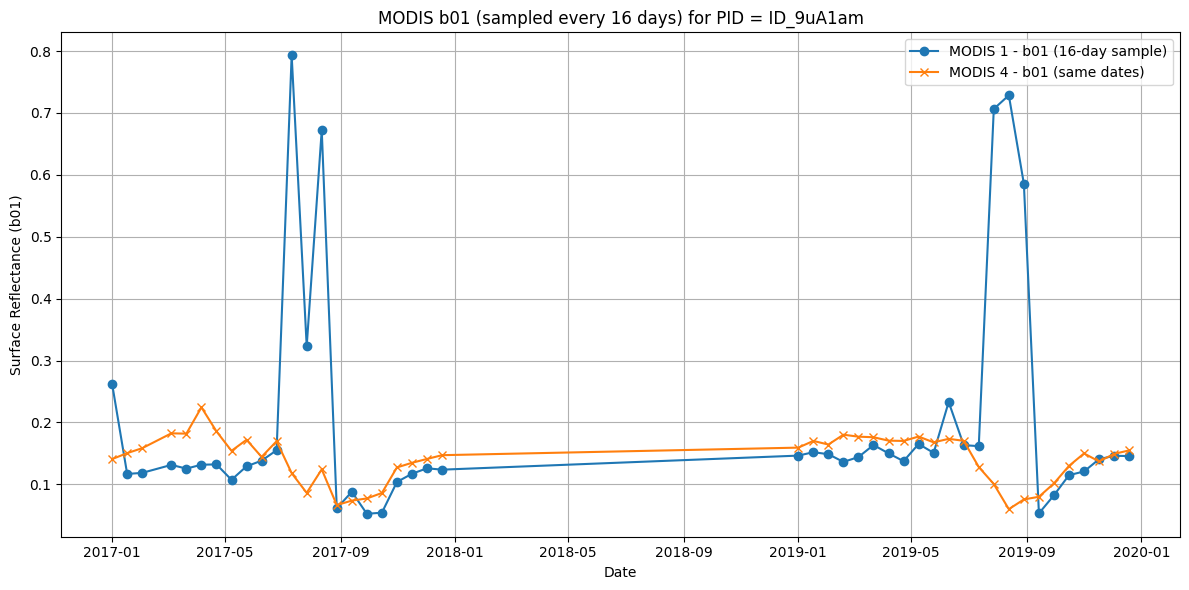

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert date to datetime if not already
modis_1['date'] = pd.to_datetime(modis_1['date'])
modis_4['date'] = pd.to_datetime(modis_4['date'])

# Merge on PID and date
merged = pd.merge(
    modis_1[['PID', 'date', 'sur_refl_b01']],
    modis_4[['PID', 'date', 'sur_refl_b01']],
    on=['PID', 'date'],
    suffixes=('_modis1', '_modis4')
)

# Select a PID to plot
example_pid = merged['PID'].iloc[10]

# Filter for that PID
plot_data = merged[merged['PID'] == example_pid].copy()

# Sort by date
plot_data.sort_values('date', inplace=True)

# Resample MODIS 1 every ~16 days (we assume MODIS is daily)
# Use `.drop_duplicates` with a 16-day frequency to simulate that
plot_data = plot_data.set_index('date')
plot_data_16day = plot_data[~plot_data.index.to_period('16D').duplicated(keep='first')]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_data_16day.index, plot_data_16day['sur_refl_b01_modis1'], label='MODIS 1 - b01 (16-day sample)', marker='o')
plt.plot(plot_data_16day.index, plot_data_16day['sur_refl_b01_modis4'], label='MODIS 4 - b01 (same dates)', marker='x')
plt.xlabel('Date')
plt.ylabel('Surface Reflectance (b01)')
plt.title(f'MODIS b01 (sampled every 16 days) for PID = {example_pid}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Engineering Features for modis_1

In [12]:
modis_1.columns

Index(['date', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b04',
       'sur_refl_b05', 'sur_refl_b06', 'sur_refl_b07', 'PID'],
      dtype='object')

### NDWI (Normalized Difference Water Index)

$$
\mathrm{NDWI} = \frac{\mathrm{sur\_refl\_b02} - \mathrm{sur\_refl\_b06}}{\mathrm{sur\_refl\_b02} + \mathrm{sur\_refl\_b06}}
$$

*Description:* NDWI highlights water content by contrasting green band (b02) and shortwave infrared band (b06). Higher values indicate more water presence.


In [12]:

for col in ['sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b05', 'sur_refl_b06', 'sur_refl_b07']:
    modis_1[col].replace(0, np.nan, inplace=True)



# Calculate NDWI in place
modis_1['NDWI'] = (modis_1['sur_refl_b02'] - modis_1['sur_refl_b06']) / (modis_1['sur_refl_b02'] + modis_1['sur_refl_b06'])

### Clay Index

$$
\mathrm{Clay\_Index} = \frac{\mathrm{sur\_refl\_b07}}{\mathrm{sur\_refl\_b05}}
$$

*Description:* Ratio of bands b07 (mid-infrared) to b05 (near-infrared) sensitive to clay minerals in soil.

In [13]:
# Calculate Clay Index (b07 / b05) in place
modis_1['Clay_Index'] = modis_1['sur_refl_b07'] / modis_1['sur_refl_b05']

### SAVI (Soil Adjusted Vegetation Index)

$$
\mathrm{SAVI} = \left(\frac{\mathrm{sur\_refl\_b02} - \mathrm{sur\_refl\_b01}}{\mathrm{sur\_refl\_b02} + \mathrm{sur\_refl\_b01} + L}\right) \times (1 + L), \quad L = 0.5
$$

*Description:* SAVI adjusts the Normalized Difference Vegetation Index (NDVI) to minimize soil brightness influence, improving vegetation signal especially in areas with sparse vegetation.

In [14]:
L = 0.5  # SAVI parameter
# Calculate SAVI in place
modis_1['SAVI'] = ((modis_1['sur_refl_b02'] - modis_1['sur_refl_b01']) / (modis_1['sur_refl_b02'] + modis_1['sur_refl_b01'] + L)) * (1 + L)

### Iron Oxide Index

$$
\mathrm{Iron\_Oxide} = \frac{\mathrm{sur\_refl\_b01}}{\mathrm{sur\_refl\_b03}}
$$

*Description:* Ratio of band b01 (red) to b03 (blue) sensitive to iron oxide content in soils and rocks.

In [15]:
# Calculate Iron Oxide Index (b01 / b03) in place
modis_1['Iron_Oxide'] = modis_1['sur_refl_b01'] / modis_1['sur_refl_b03']

In [16]:
# Replace infinities and NaNs resulting from division by zero
modis_1.replace([np.inf, -np.inf], np.nan, inplace=True)
modis_1.fillna(0, inplace=True)

In [19]:
sentinel_2['date'].unique()

<DatetimeArray>
['2019-12-18 00:00:00', '2019-12-31 00:00:00', '2019-06-21 00:00:00',
 '2019-06-24 00:00:00', '2019-12-21 00:00:00', '2019-10-04 00:00:00',
 '2019-03-08 00:00:00', '2019-12-22 00:00:00', '2019-06-10 00:00:00']
Length: 9, dtype: datetime64[ns]

In [28]:
print('*'*150)

******************************************************************************************************************************************************


7744
2418
10058


In [56]:
missing_from_modis = (set(df['PID']) | set(test_df['PID'])) - set(modis_1['PID'])
print("PIDs used in df/test_df but missing from modis_1:", len(missing_from_modis))


PIDs used in df/test_df but missing from modis_1: 104


In [57]:
missing_from_modis = (set(df['PID']) | set(test_df['PID'])) - set(modis_1['PID'])
print("PIDs used in df/test_df but missing from modis_1:", len(missing_from_modis))

# Ensure consistent formatting (string type, stripped)
test_df['PID'] = test_df['PID'].astype(str).str.strip()
modis_1['PID'] = modis_1['PID'].astype(str).str.strip()

# Compute missing PIDs
missing_pids_in_modis = set(test_df['PID']) - set(modis_1['PID'])

print(f"PIDs in test_df but missing from modis_1: {len(missing_pids_in_modis)}")
print(missing_pids_in_modis)

# Compute missing PIDs
missing_pids_in_modis = set(df['PID']) - set(modis_1['PID'])

print(f"PIDs in df but missing from modis_1: {len(missing_pids_in_modis)}")
print(missing_pids_in_modis)


PIDs in test_df but missing from modis_1: 43
{'ID_cLAcv2', 'ID_sapIkq', 'ID_ufqJYp', 'ID_edTgTR', 'ID_EJkc3l', 'ID_NpQgDB', 'ID_APsL3e', 'ID_crEoaw', 'ID_VLPHUT', 'ID_5xYRZQ', 'ID_j1xt01', 'ID_53YYmv', 'ID_h2bh00', 'ID_ucU3Hf', 'ID_qwO7TL', 'ID_bBsgpo', 'ID_NH1a7g', 'ID_ChSZJp', 'ID_lJ5FgG', 'ID_7HFhkf', 'ID_ouRVyO', 'ID_k3lBci', 'ID_FY8taN', 'ID_bKE4ep', 'ID_MZ9bLj', 'ID_UZkX5N', 'ID_ceXayt', 'ID_YZAziY', 'ID_qDlOWH', 'ID_jWgJ9H', 'ID_Ur0qu0', 'ID_1Cy9Rw', 'ID_vmki9G', 'ID_kJEGGo', 'ID_5vwCJC', 'ID_QGFpJC', 'ID_yWsT6x', 'ID_PTXOfN', 'ID_0vMzAQ', 'ID_HS3rds', 'ID_u6HvaL', 'ID_jGnpfM', 'ID_mZJr40'}


PIDs in df but missing from modis_1: 61
{'ID_ieQdi2', 'ID_27urKO', 'ID_fpaQU7', 'ID_glGmjI', 'ID_AIN8g8', 'ID_RyPvLs', 'ID_Ke4Fxz', 'ID_zx9Mkk', 'ID_RfdzzM', 'ID_gqwkfC', 'ID_Kp65kb', 'ID_3QAeMh', 'ID_wXKucO', 'ID_Q7CHe1', 'ID_JNuWzK', 'ID_7fCyD8', 'ID_yBCpW0', 'ID_ImazxG', 'ID_pvO8qk', 'ID_nWsW8Z', 'ID_bZXgUA', 'ID_LolhhM', 'ID_UYO3jX', 'ID_MeUsGa', 'ID_qXlLR5', 'ID_g3hTcY', 'ID_vUK5KF', 'ID_EJsRNk', 'ID_CCeFaD', 'ID_R30Uz7', 'ID_KC24Oz', 'ID_Tgdjfd', 'ID_RQLHIv', 'ID_DGJa8K', 'ID_mY9p3X', 'ID_aPJTXn', 'ID_tUnCzy', 'ID_fz2Yp9', 'ID_ZiPnsa', 'ID_VmJAjd', 'ID_DHE2Gw', 'ID_3spnCM', 'ID_4NYIMT', 'ID_QTLGIy', 'ID_Hjx59s', 'ID_efFZuJ', 'ID_rUkGX6', 'ID_2fd2lH', 'ID_cNEfn9', 'ID_KRagnM', 'ID_fdQoF3', 'ID_K9Bk8i', 'ID_sa2QZq', 'ID_Y38cZq', 'ID_boEz4i', 'ID_9z7Nza', 'ID_o5eYX7', 'ID_557ota', 'ID_GEzaJb', 'ID_eFTGlf', 'ID_8FlJMr'}


In [19]:
merged_df.drop(columns=['sur_refl_b01','sur_refl_b03'],inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
X = merged_df.drop(columns=target_columns)
y = merged_df[target_columns]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns=['PID'])
X_val = X_val.drop(columns=['PID'])
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42,n_jobs=-1))
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
from sklearn.metrics import mean_squared_error, r2_score
mse_per_target = mean_squared_error(y_val, y_pred, multioutput='raw_values')
r2_per_target = r2_score(y_val, y_pred, multioutput='raw_values')


for i, (nutrient, mse, r2) in enumerate(zip(target_columns, mse_per_target, r2_per_target)):
    rmse = np.sqrt(mse)
    print(f"{nutrient}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f' RMSE: {rmse:.4f}')

NameError: name 'merged_df' is not defined

In [33]:
test_df.columns

Index(['site', 'PID', 'lon', 'lat', 'pH', 'alb', 'bio1', 'bio12', 'bio15',
       'bio7', 'bp', 'cec20', 'dows', 'ecec20', 'hp20', 'ls', 'lstd', 'lstn',
       'mb1', 'mb2', 'mb3', 'mb7', 'mdem', 'para', 'parv', 'ph20', 'slope',
       'snd20', 'soc20', 'tim', 'wp', 'xhp20', 'BulkDensity'],
      dtype='object')

In [34]:
test_df.drop(columns=['lat','lon','site'],inplace=True)

In [35]:

merged_test_df = pd.merge(test_df, modis_agg, on='PID', how='inner')  # 'inner' ensures only common PIDs are kept

# Now `merged_df` contains only rows whose PIDs exist in both df and modis_1


In [40]:
len(merged_test_df)

2375

In [54]:
len(modis_1['PID'].unique())

10058

In [38]:
test_predictions = model.predict(merged_test_df.drop(columns=['PID']))

In [39]:
# Split the predictions into separate columns
N_pred =  test_predictions[:, 0]  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3]  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()
# prompt: turn submission into a 3 column file that has the column PID, Nutrient, Value
submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

ValueError: array length 2375 does not match index length 2418